

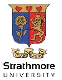

*   **Name: Rosemary Kanyoro**
*   **Admission Number: 149765**
*   **Unit: DSA 8502_Predictive and Optimisation Analytics**


---




 **Project Title:**

 **A MACHINE LEARNING APPROACH TO PREDICTION OF GROSS DOMESTIC PRODUCT (GDP): ANALYSING GEO-ECONOMIC DEVELOPMENT FACTORS**


---



 **-> Introduction**

Several elements play a significant role in shaping a nation's economic growth and development, with the gross domestic product (GDP) being a pivotal factor. On the other hand, the GDP is impacted by many different factors and determining and prioritizing these factors is a subjective matter for decision-makers and analysts. The assessment of a nation's economic health and prosperity has often relied on macroeconomic indicators such as inflation rates, unemployment figures, fiscal policies, and foreign exchange rates. However, the scope of GDP analysis is broadening beyond these conventional macroeconomic factors and economists are now acknowledging the influential roles played by various social, demographic, and technological factors. GDP refers to the total economic output of a country in a given period of time and is calculated by adding up the total value of all services and goods that are produced domestically, minus the value of any imported goods and services. For many countries, GDP is the most important indicator of a economic health and development, and it is the central measure of national economic activity. Dividing GDP at current market prices by the population then derives the levels of GDP per capita, making it a good measurement of the standard of living of a country.  


My project attempts to investigate the relationship between geo-economic factors such as population, literacy, death rate and infant mortality and a nation's GDP per capita and apply a machine learning algorithm to develop a model that can leverage such economic data points and accurately predict the GDP per capita. The proposed model is built on a dataset of different countries and their corresponding GDP per capita values containing the geo-economic development factors, which will be trained and validated on a separate dataset. The developed model, having undergone rigorous training and validation, is intended to provide accurate GDP predictions. It will serve as the foundation for creating an interactive GDP simulator, which will be accessible through a Streamlit interface. This simulator empowers users to input diverse geo-economic parameters, allowing them to receive GDP predictions. By leveraging this tool, strategic planning becomes more informed and it can be used to make resource allocation more efficient. 

---


 **-> Research Questions**

I seek to answer the following questions:

1.   What factors are most strongly correlated with the GDP per capita of a country?
2.   Which countries have the highest and lowest GDP per capita and are the same factors influential in both groups?
3. Can a machine learning algorithm be trained on the various factors and then accurately predict GDP per capita for any given country?
4. Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa
5. Can I use the model to build a GDP simulator for Kenya from the insights gained about the Sub-Saharan Africa region?

---
 **-> Hypothesis**
The project principally seeks to investigate whether geo-economic factors such as population density, literacy rate, and agricultural productivity significantly influence a country's GDP per capita. 

 1. **Ho** : There is no significant relationship between geo-economic factors and GDP per capita.
 2. **Ha** : There is a significant relationship between geo-economic factors and GDP per capita. 

---
 **-> Dataset**

The dataset was compiled using information from various sources inclusing Kaggle,the World Factbook hosted by U.S Central Intelligence Agency (CIA) website, Macrotrends LLC and the World Bank. The data contains 5448 records, and it contain the GDP per Capita of 227 countries spanning 23 years from 1995 to 2018. The countries are categorised in 11 different geographical regions.

---
 **-> Assumptions**


1.   Quality: it is assumed that the data sourced from the U.S. Central Intelligence Agency (CIA), World Bank and Macrotrends website is reliable.
2.   Geo-economic factors are assumed to have a meaningful relationship with a country's economic development and are significant contributors to GDP variations.
3. It is assumed that regions marked in the dataset share commonalities in terms of economic, social, and geographic characteristics that may influence GDP per capita.


---
 **-> Scope**


1.   227 countries are covered in this analysis.
2.   The data ranges from the years 1995 to 2018
3. Only geo-economic features included in the dataset are analysed in relation to GDP


---
 **-> Motivation**

GDP per capita is a widely utilized metric by development experts in the analysis of economic growth. This project provides an opportunity for me to leverage my background in finance and economics to analyze how geo-economic factors can inform economic development. By focusing on GDP per capita and identifying key influencing factors, I aim to shed light on critical aspects of economic growth. The ultimate development of a GDP simulator deployed through Streamlit provides dependable predictions and can strategic planning with insightful data to imporve resource allocation efficiency. 

---









#  **Importing Libraries**

I begin by importing all the libraries I will use for all the code I will use in the notebook

In [627]:
#Include libraries to be used
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pydotplus
import ssl
import statsmodels
import shap
import io
import lime
import lime.lime_tabular
import missingno as mn
import pickle
import statsmodels.api as sm
import warnings
import xgboost as xgb
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold
from tabulate import tabulate
from prophet import Prophet
%matplotlib inline

#  **Section 1) Loading and inspecting the data**


In this section, I import the data from GitHub and load it into the notebook. I then proceed to check the shape of the dataset to understand its dimensions. Additionally, I generate descriptive statistics for the DataFrame, providing insights into the central tendency, dispersion, and shape of the numerical features.

In [628]:
#reading the data and correcting the comma separators to be decimals
ssl._create_default_https_context = ssl._create_unverified_context
df=pd.read_csv('https://raw.githubusercontent.com/RoseWairimuK/Files/main/countries_data.csv')
df.head()

,Country,Region,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Year
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,2018
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00,2018
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,2018
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,2018
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,2018


In [629]:
#checking the rows and columns to confirm the 227 countries
df.shape

(5448, 21)

In [630]:
#inspecting the data
df.describe()

,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,Phones_per_1000,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Year
count,5.448000e+03,5.448000e+03,5448.000000,5448.000000,5376.000000,5376.000000,5424.000000,5016.000000,5352.000000,5400.000000,5400.000000,5400.000000,4920.000000,5376.000000,5352.000000,5088.000000,5064.000000,5088.000000,5448.000000
mean,2.531315e+07,5.800571e+05,352.558554,19.887726,0.035882,33.605926,9316.860251,79.049860,219.757698,13.160324,4.350344,75.491781,2.010650,20.796414,8.654595,97.556496,201.904747,368.976612,2006.500000
std,1.092841e+08,1.736091e+06,1544.584886,67.950568,4.610566,33.574182,9677.456026,19.453917,212.622306,12.452581,7.968781,15.673722,0.668828,10.603738,4.702849,122.644771,169.232364,271.706415,6.922822
min,5.928000e+03,2.000000e+00,0.000000,0.000000,-21.650000,1.900000,336.000000,15.200000,0.200000,0.000000,0.000000,28.000000,0.800000,6.180000,1.930000,0.000000,0.000000,0.200000,1995.000000
25%,3.708852e+05,4.233000e+03,27.075000,0.100000,-0.900000,7.600000,1832.000000,68.900000,34.100000,3.100000,0.180000,65.800000,1.700000,11.887500,5.490000,0.400000,0.400000,0.700000,2000.750000
50%,3.842311e+06,8.312550e+04,71.950000,0.700000,0.000000,20.100000,5341.000000,85.800000,159.900000,9.900000,1.010000,78.400000,2.000000,18.020000,7.405000,49.200000,217.950000,438.200000,2006.500000
75%,1.390529e+07,4.170545e+05,175.300000,9.900000,0.950000,53.722500,14983.500000,92.500000,358.600000,19.300000,4.380000,86.900000,2.600000,28.225000,10.242500,149.950000,299.850000,588.075000,2012.250000
max,1.362571e+09,1.786940e+07,17077.000000,909.300000,23.790000,201.300000,57931.000000,105.200000,1076.500000,64.400000,52.460000,102.700000,4.200000,53.080000,31.220000,809.500000,949.600000,1000.900000,2018.000000


#### **Section 1 observations summary:**

---



*   The data contains a total of 5,448 rows and 21 columns: 20 columns show the various factors and one column is the GDP per capita.
*  The features are the name of the country, the geographical region, respective year of the data and 17 geo-economic factors. The full list of the variables in the dataset are: country, geographical region, population, year, population density per square miles, area in square miles, coastline to area ratio, net migration, infant mortality per 1000 births, GDP per capita in USD terms, literacy levels in %, phones owned per 1000 persons, arable land in %, proportion of arable land with crops, climate category assigned to the country, birthrate, deathrate, agricultural sector's
contribution to GDP, industry sector's contribution to GDP, contribution of all other sectors to GDP and the service sector's contribution to GDP. 
*   The summary statistics of the numerical columns confirm the expected variations because this is data for a variety of countries.
*   The count row implies there are missing values in some of the columns and this will be investigated in the next section. 



---







#  **Section 2) Data Cleaning**











### **2.1) Identifying problems**

With such a large dataset it is imperative to understand the initial state of the data, identify the issues that may affect my data modellings. Therefore in this section, I aim to ensure the quality and integrity of the dataset. I begin by inspecting the column names to ensure clarity and consistency. Next, I identify outliers within the data checking if any anomalies will impact analysis. Additionally, I examine the data types of each column to ensure they are appropriate for their respective variables. Finally, I conduct a thorough check for null values and implement strategies to resolve any issues observed, thereby preparing the dataset for further analysis.








In [631]:
#viewing the columns.
df.columns

Index(['Country', 'Region', 'Population', 'Area_Sq_m', 'Pop. Density_per_sq_m',
       'Coastline_coast_area_ratio', 'Net migration',
       'Infant_mortality_per_1000_births', 'GDP_$_per_capita', 'Literacy_%',
       'Phones_per_1000', 'Arable_%', 'Crops_%', 'Other_%', ' Climate ',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'Year'],
      dtype='object')

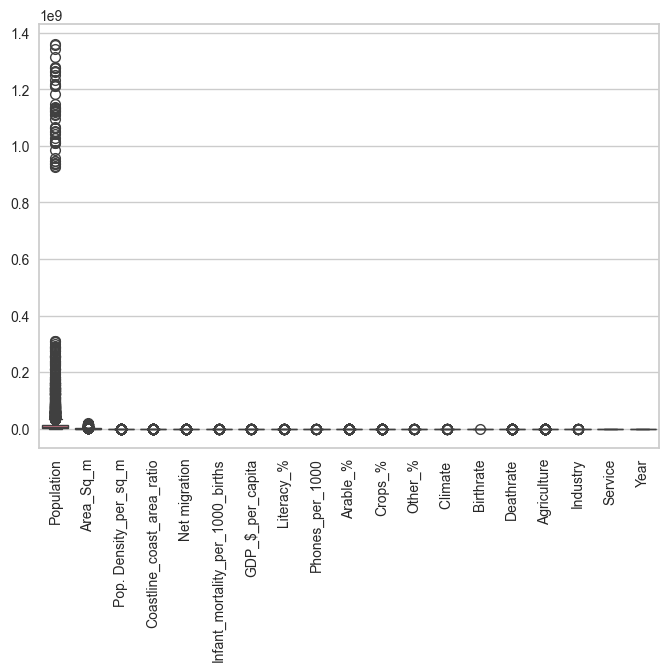

In [632]:
#checking for outliers. None, except for variations in the population per country as expected.
sns.boxplot(data = df)
plt.xticks(rotation=90);

In [633]:
#visualising the data types. No further action needed
df.dtypes

Country                              object
Region                               object
Population                            int64
Area_Sq_m                             int64
Pop. Density_per_sq_m               float64
Coastline_coast_area_ratio          float64
Net migration                       float64
Infant_mortality_per_1000_births    float64
GDP_$_per_capita                    float64
Literacy_%                          float64
Phones_per_1000                     float64
Arable_%                            float64
Crops_%                             float64
Other_%                             float64
 Climate                            float64
Birthrate                           float64
Deathrate                           float64
Agriculture                         float64
Industry                            float64
Service                             float64
Year                                  int64
dtype: object

In [634]:
#checking nill values in the data set. Out of the 21 clumns 14 have nill values
df.isnull().any()

Country                             False
Region                              False
Population                          False
Area_Sq_m                           False
Pop. Density_per_sq_m               False
Coastline_coast_area_ratio          False
Net migration                        True
Infant_mortality_per_1000_births     True
GDP_$_per_capita                     True
Literacy_%                           True
Phones_per_1000                      True
Arable_%                             True
Crops_%                              True
Other_%                              True
 Climate                             True
Birthrate                            True
Deathrate                            True
Agriculture                          True
Industry                             True
Service                              True
Year                                False
dtype: bool

In [635]:
# displaying nulls as percentages
def background_gradient(val):
    if isinstance(val, (int, float)):
        color = 'background-color: lightblue' if val > 0 else ''
        return color
    return ''

# Create DataFrame with NA count and percentage
NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
                       for i in (df.isna().sum()/df.shape[0]*100).tolist()]],
                       columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

# Apply background gradient using the custom function
styled_df = NA.style.applymap(background_gradient, subset=['NA Count'])

# Display styled DataFrame
styled_df

,NA Count,NA Percent
Country,0,0.00%
Region,0,0.00%
Population,0,0.00%
Area_Sq_m,0,0.00%
Pop. Density_per_sq_m,0,0.00%
Coastline_coast_area_ratio,0,0.00%
Net migration,72,1.32%
Infant_mortality_per_1000_births,72,1.32%
GDP_$_per_capita,24,0.44%
Literacy_%,432,7.93%


<Axes: >

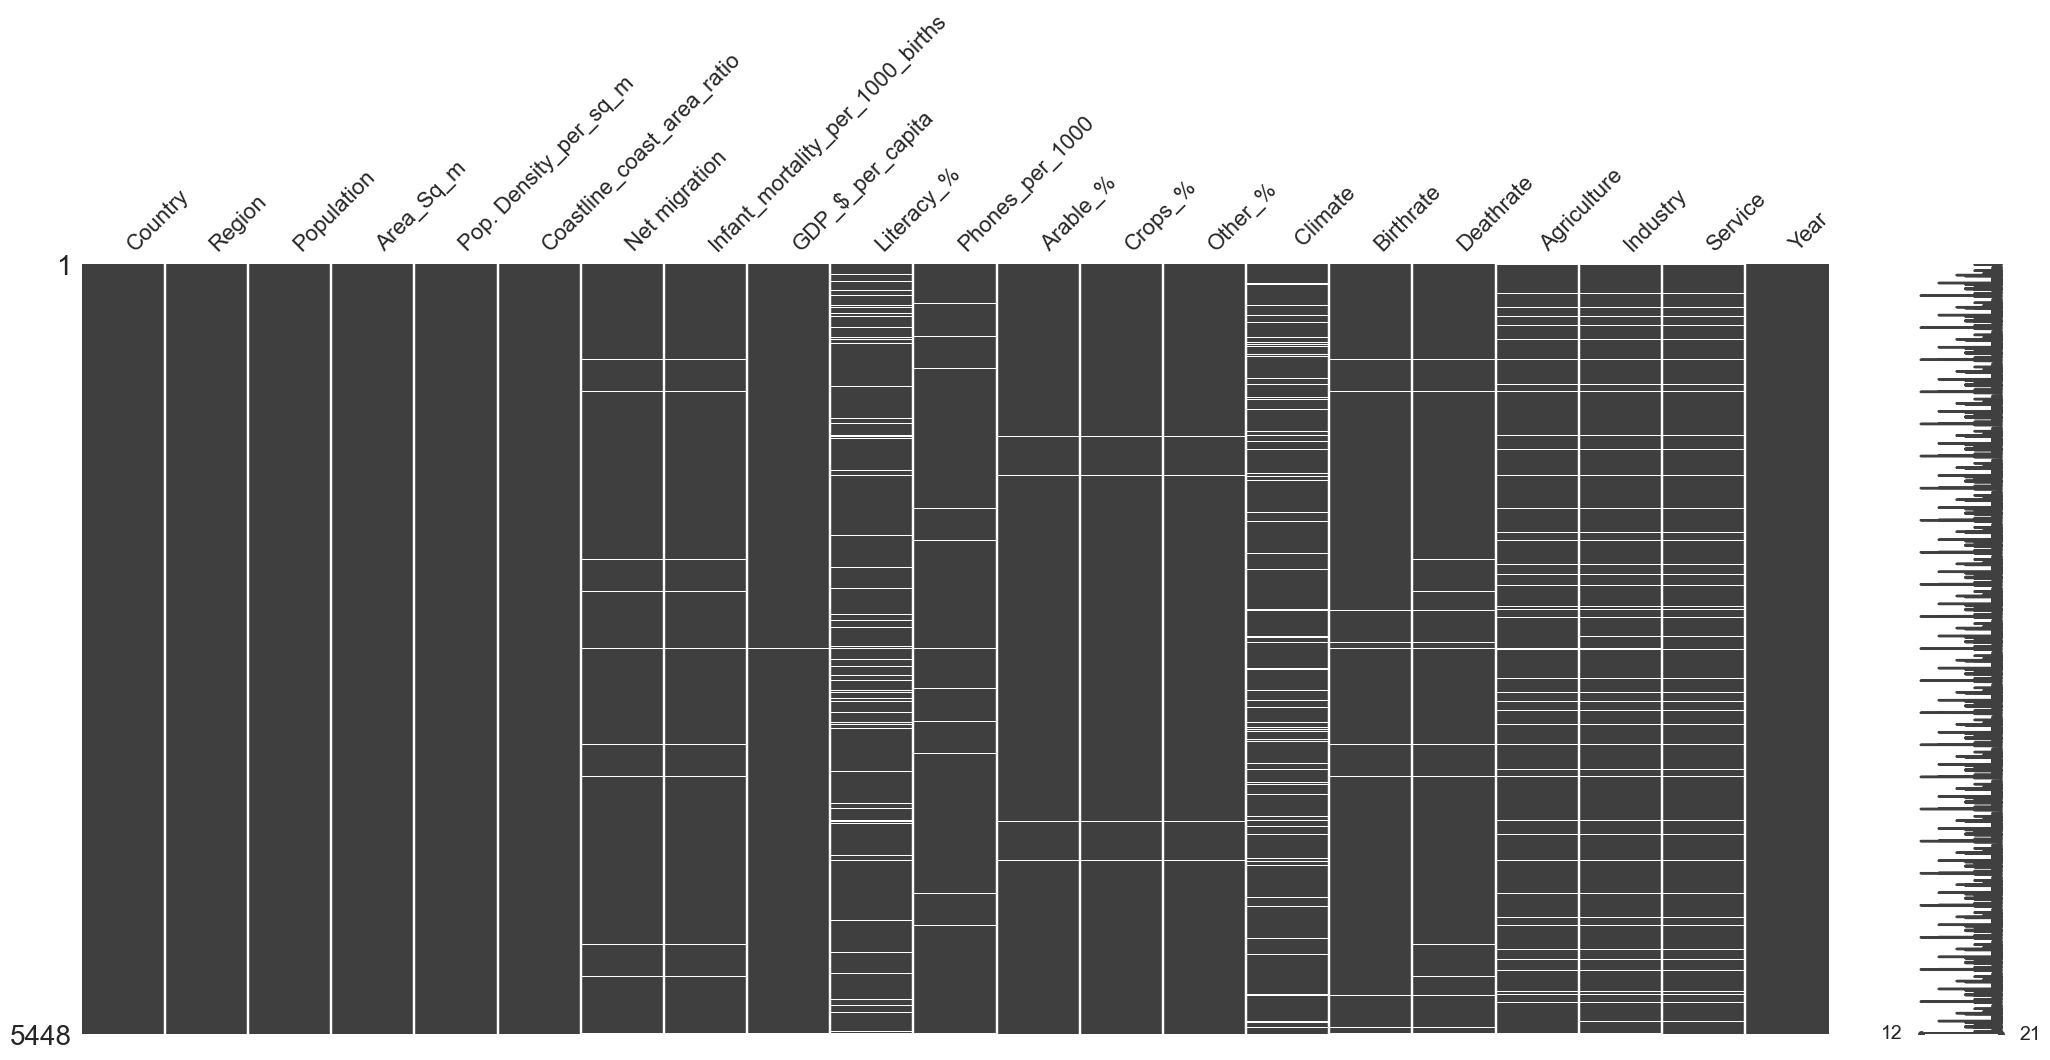

In [636]:
#visualising the nulls
mn.matrix(df)

###  **2.2) Filling the missing values**

1.   Countries that are close geologically are often similar in many ways and hence in the next section I proceed to fill in the null values using the median of the specific region that a country belongs to.  
2.   For climate,which is a categorical feature, I use the mode instead of median to maintain the consistency in the ratings. For instance, the climate variable in the dataset is ranked from 1-4 hence the mode maintains this rating.










In [637]:
#grouping by region to inspect the medians.
df.groupby('Region')[['GDP_$_per_capita','Literacy_%','Agriculture']].median()

,GDP_$_per_capita,Literacy_%,Agriculture
Region,,,
ASIA (EX. NEAR EAST),3268.0,83.60,87.70
BALTICS,10965.0,93.40,0.00
C.W. OF IND. STATES,3380.5,92.70,184.85
EASTERN EUROPE,8439.5,92.05,59.20
LATIN AMER. & CARIB,6326.0,87.60,32.50
NEAR EAST,8469.0,78.95,24.95
NORTHERN AFRICA,5709.5,65.10,126.30
NORTHERN AMERICA,29165.0,91.95,0.00
OCEANIA,4979.0,88.95,70.65


-> For more clarity on the countries found in the regions that are not commonly known here is a description:




*   Near East - Bahrain, Cyprus, Gaza, Iraq, Israel, Jordan, Kuwait, Lebanon, Oman, Qatar, Saudi, Syria, Turkey, UAE, West Bank and Yemen.
*   Baltics - Estonia, Latvia and Lithuania
*   C.W. OF Ind States (Commonwealth of Independent States) - Armenia, Azerbaijan,Belarus, Georgia, Kazakhstan, Kyrgyzstan, Moldova, Russia, Tajikistan, Turmenistan, Ukraine and Uzbekistan






In [638]:
#filling the missing values
warnings.filterwarnings('ignore')
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        fill_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        fill_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = fill_values[region]

In [639]:
#confirming there are no missing values in the cleaned dataset
df.isnull().any()

Country                             False
Region                              False
Population                          False
Area_Sq_m                           False
Pop. Density_per_sq_m               False
Coastline_coast_area_ratio          False
Net migration                       False
Infant_mortality_per_1000_births    False
GDP_$_per_capita                    False
Literacy_%                          False
Phones_per_1000                     False
Arable_%                            False
Crops_%                             False
Other_%                             False
 Climate                            False
Birthrate                           False
Deathrate                           False
Agriculture                         False
Industry                            False
Service                             False
Year                                False
dtype: bool

<Axes: >

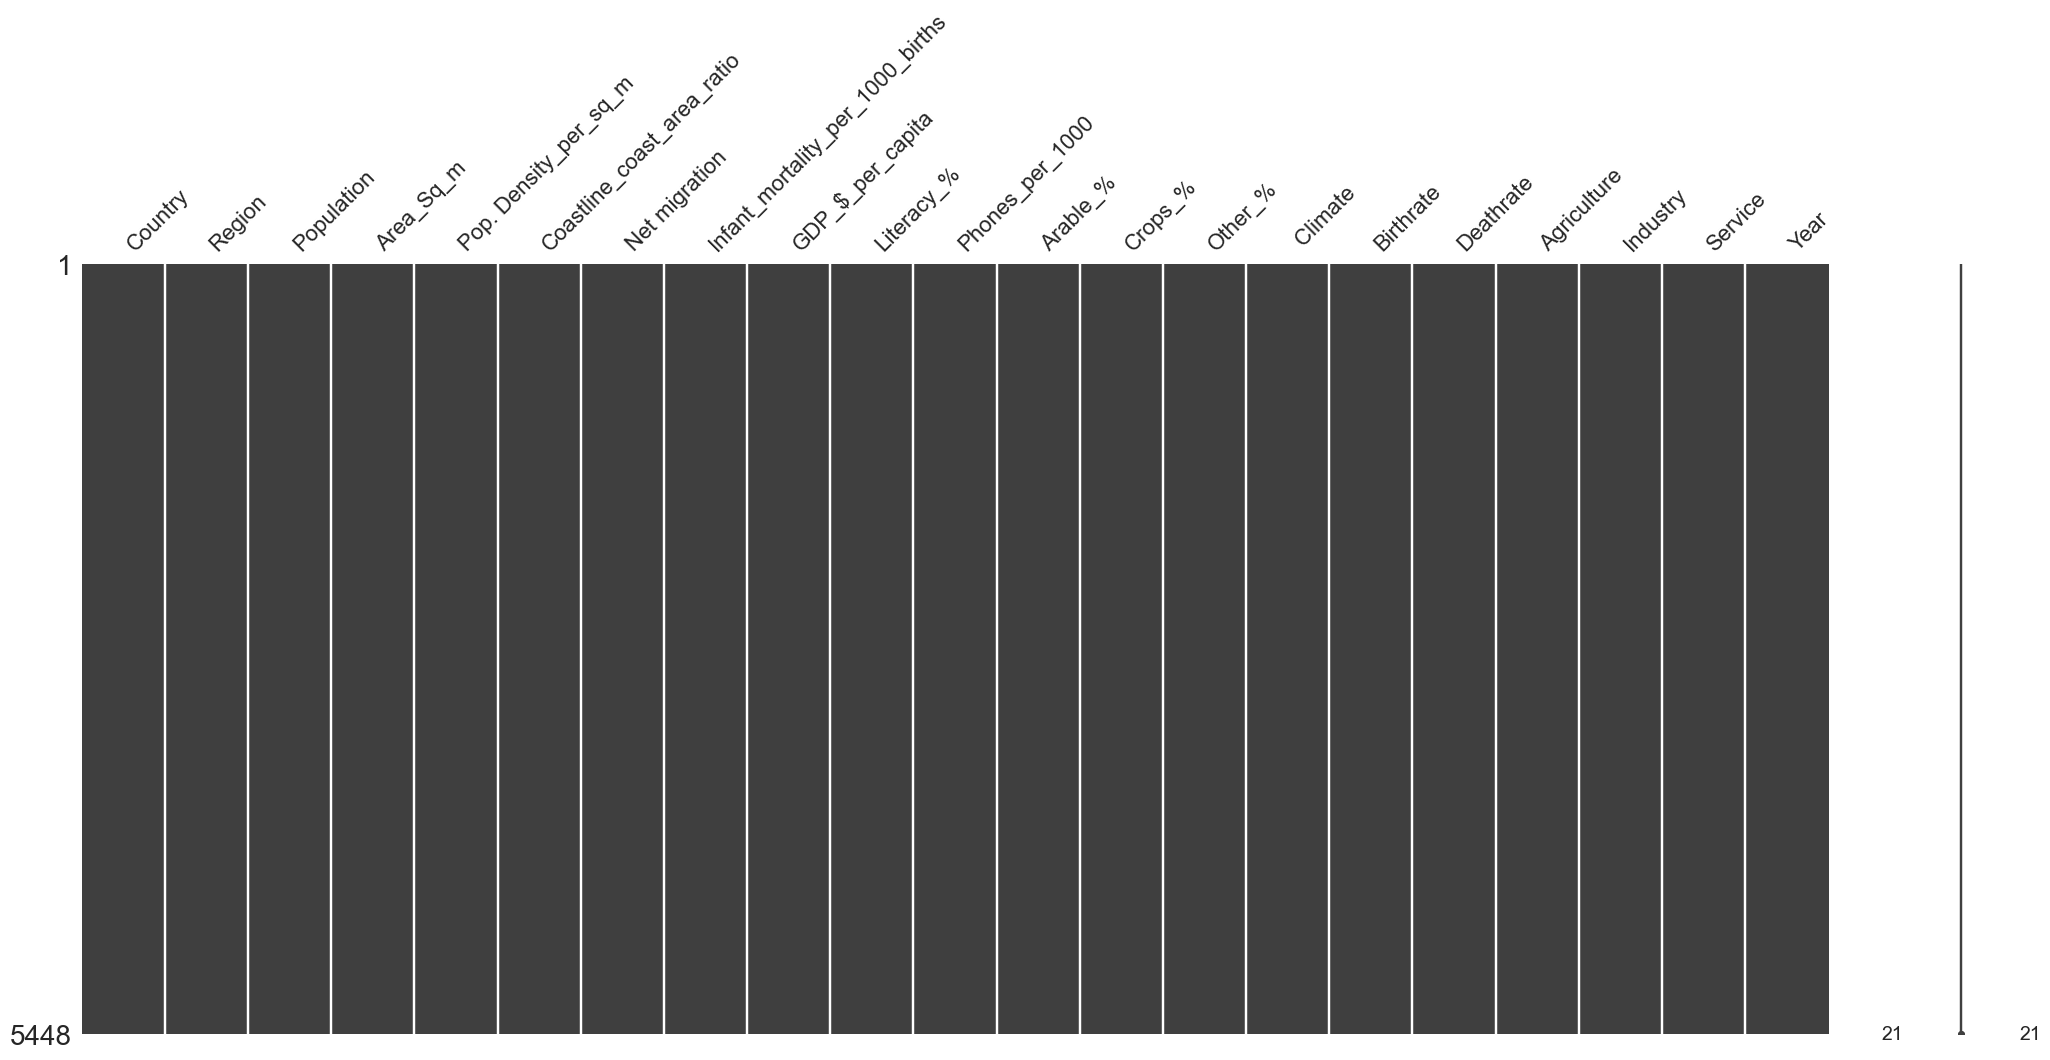

In [640]:
#visual confirming the clean data
mn.matrix(df)

#### **Section 2 observations summary:**

---

In preparation for data modelling the identified data issues have now been resolved as follows:

**1. Outliers**: Upon inspecting the outliers identified, it was observed that these were primarily evident in the population column. It is acknowledged that different countries exhibit varying population sizes due to factors such as land area, historical population trends, and demographic patterns. Eliminating these outliers could potentially skew the analysis and compromise the accuracy and integrity of the underlying assumptions. Therefore, the decision was made to retain these outliers to maintain the dataset's representativeness and ensure a comprehensive analysis of the data.

**2.Nulls**: Null values were observed in the dataset, particularly in the columns representing various geo-economic factors. To address this, a pragmatic approach was adopted. Considering that countries geographically close to each other often share similarities in economic and social indicators, null values were filled using the median of the specific region to which a country belongs. This approach aligns with economic principles as it acknowledges the regional dynamics and ensures a more accurate representation of the data. Additionally, for the categorical feature 'climate', which represents the classification of a country's climate, null values were filled using the mode instead of the median. This decision was made to maintain consistency in the ratings and ensure no row was dropped, thereby preserving the integrity of the dataset.

---



#  **Section 3) Data Exploration**

The next sections explore the data to answer two questions from my objectives:


1. **What factors are most strongly correlated with the GDP per capita of a country?**

2.   **Which countries have the highest and lowest GDP per Capita and are the same factors influencial in both groups?**

For a clearer view of the visualisations; the latest year data for 2018 will be used in this section

In [641]:
# Filtering the DataFrame to retain data only for the last year for ease of visualisation
df_2018 = df[df['Year'] == 2018]

###  **3.1) Regions and Countries with the highest and lowest GDP per capita**


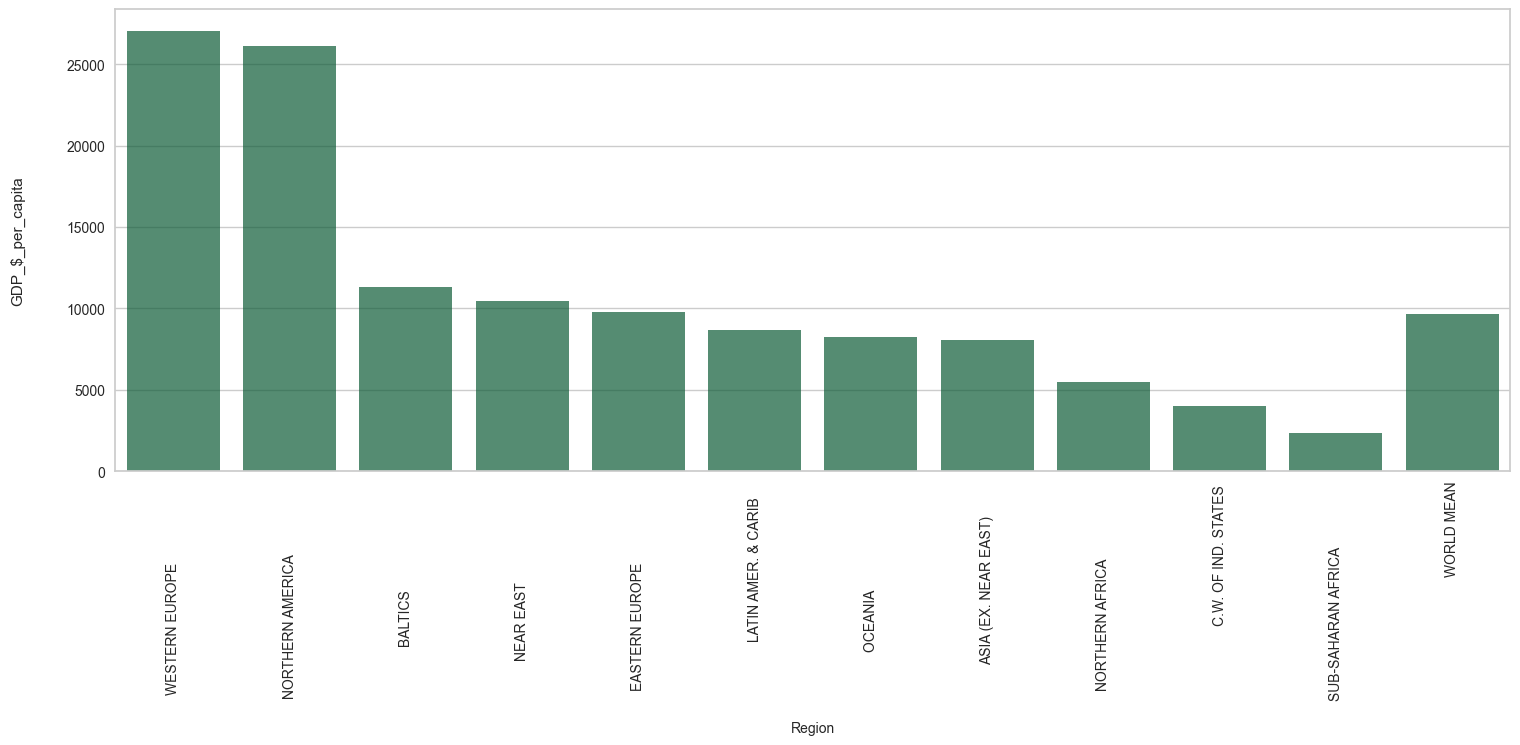

In [642]:

# Ranking the regions based on GDP per capita
fig, ax = plt.subplots(figsize=(18,6))

top_gdp_regions = df_2018.groupby('Region')['GDP_$_per_capita'].mean().sort_values(ascending=False).reset_index().head(25)
mean = pd.DataFrame({'Region':['WORLD MEAN'], 'GDP_$_per_capita':[df_2018['GDP_$_per_capita'].mean()]})
gdps = pd.concat([top_gdp_regions[['Region','GDP_$_per_capita']], mean], ignore_index=True)

sns.barplot(data=gdps, x='Region', y='GDP_$_per_capita', alpha=0.7, color='#006838')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(10)
plt.xticks(rotation=90)
plt.show()

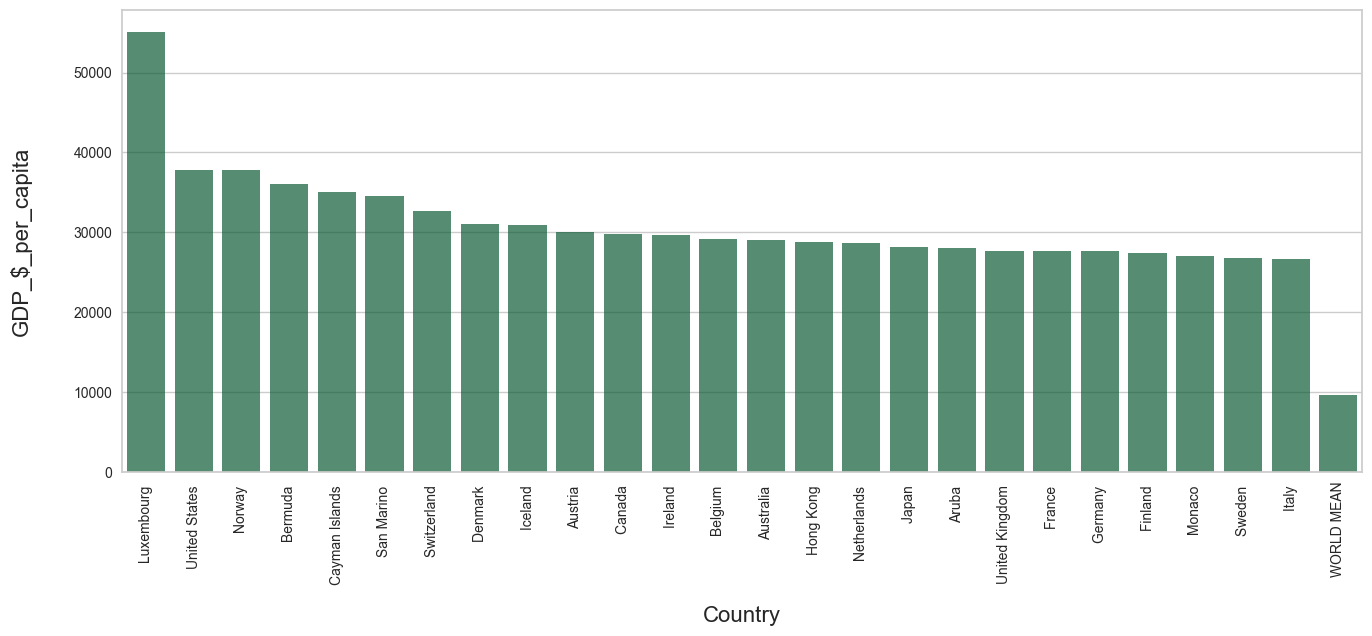

In [643]:
# Ranking the top 25 countries based on GDP per capita
fig, ax = plt.subplots(figsize=(16,6))

top_gdp_countries = df_2018.sort_values('GDP_$_per_capita', ascending=False).head(25)
mean = pd.DataFrame({'Country':['WORLD MEAN'], 'GDP_$_per_capita':[df_2018['GDP_$_per_capita'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP_$_per_capita']], mean], ignore_index=True)

sns.barplot(data=gdps, x='Country', y='GDP_$_per_capita', alpha=0.7, color='#006838')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

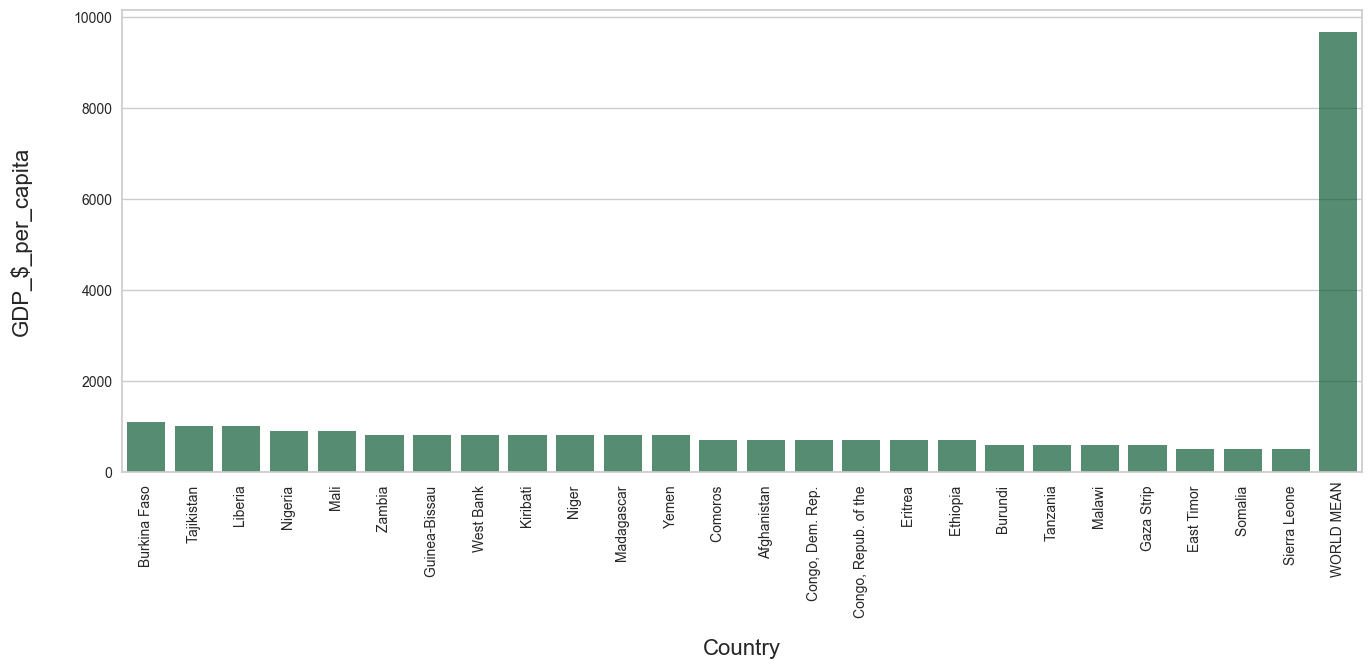

In [644]:
# Ranking the last 25 countries based on GDP per capita
fig, ax = plt.subplots(figsize=(16,6))

top_gdp_countries = df_2018.sort_values('GDP_$_per_capita', ascending=False).tail(25)
mean = pd.DataFrame({'Country':['WORLD MEAN'], 'GDP_$_per_capita':[df_2018['GDP_$_per_capita'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP_$_per_capita']], mean], ignore_index=True)

sns.barplot(data=gdps, x='Country', y='GDP_$_per_capita', alpha=0.7, color='#006838')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

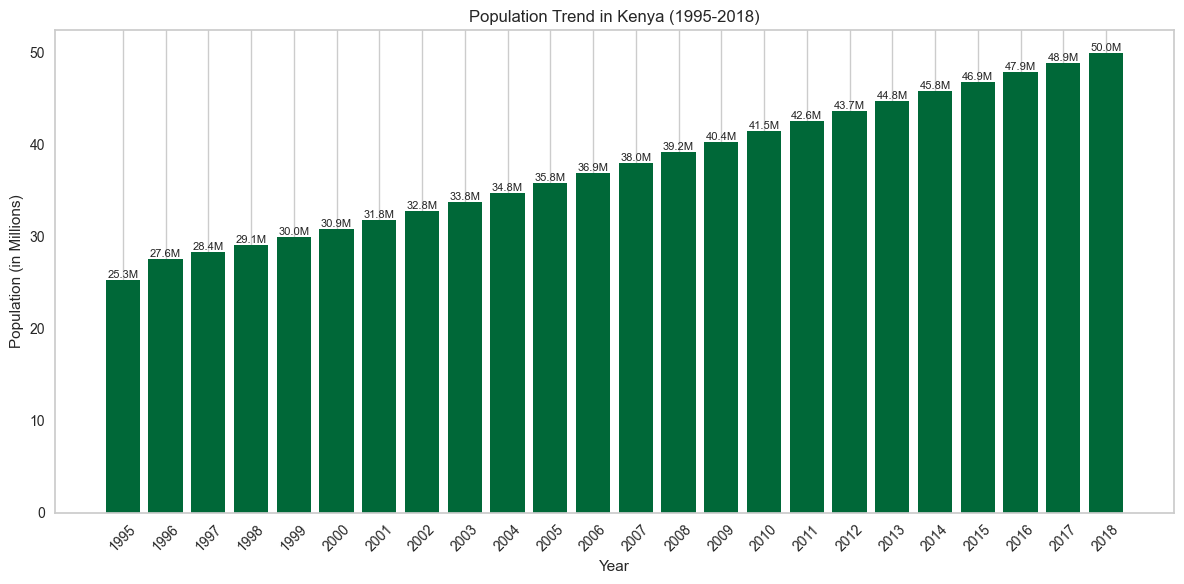

In [645]:
#Checking a sample of the Population of one country
kenya_data = df[df['Country'] == 'Kenya ']
kenya_data = df[df['Country'] == 'Kenya '].copy()  # Made a copy to suppress the SettingWithCopyWarning that was appearing before
kenya_data.loc[:, 'Population_in_millions'] = kenya_data['Population'] / 1e6
plt.figure(figsize=(12, 6))
bars = plt.bar(kenya_data['Year'], kenya_data['Population_in_millions'], color='#006838')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}M', va='bottom', ha='center', fontsize=8)

plt.title('Population Trend in Kenya (1995-2018)')
plt.xlabel('Year')
plt.ylabel('Population (in Millions)')
plt.grid(axis='y')
plt.xticks(kenya_data['Year'], rotation=45)
plt.tight_layout()
plt.show()

#### **Section 3.1 observations summary:**

---


*   The top 2 regions are Western Europe and Nothern America while Commonwealth of Independent States and Sub-Saharan Africa report the least GDP per capita.
*   In the leading Western Europe region,  Luxembourg, Norway and the United States are the countries with the highest GDP per capita. It is noteworthy that theirs is more than 3 times the world average.  
*   In the lagging Sub-Saharan Region, Somalia and Sierra Leone report the lowest GDP per Capita. Kenya is not among the least 25 countries.
*   A view of the population of Kenya demonstrates an upward trend over the years.
*   In the modelling sections, it will be imperative to check whether the predicted values for the leading and lagging regions will differ, noting the huge variation in overall GDP per capita.




---



###  **3.2) Correlation between the variables**


In tis section, I explore the relationships between various geo-economic factors within the dataset. I start with a heatmap to visualize the correlation matrix for an overview of the pairwise correlations among all the variables then I narrow down to the top six correlations by generating scatter plots. This refined inspection allows for a more detailed examination of the relationships between specific pairs of variables. Lastly, I assess regional correlations to explore potential variations in the relationships between factors across different geographic regions. 

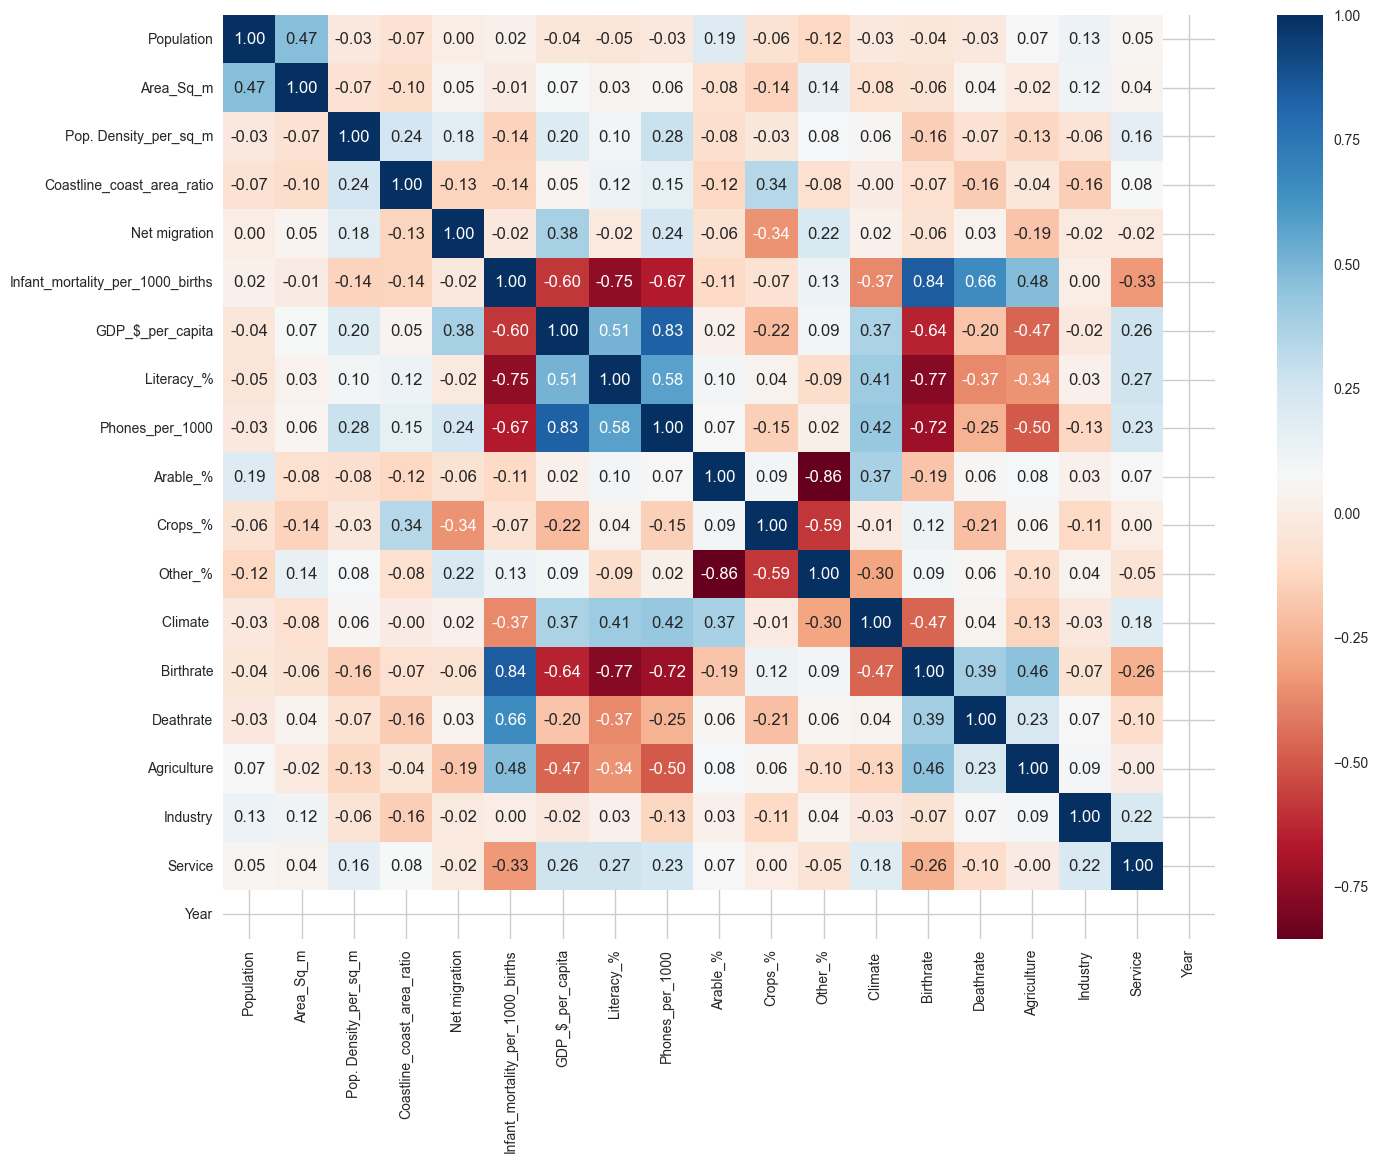

In [646]:
#correlation between the variables
plt.figure(figsize=(16,12))
sns.heatmap(data=df_2018.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='RdBu')
plt.show()

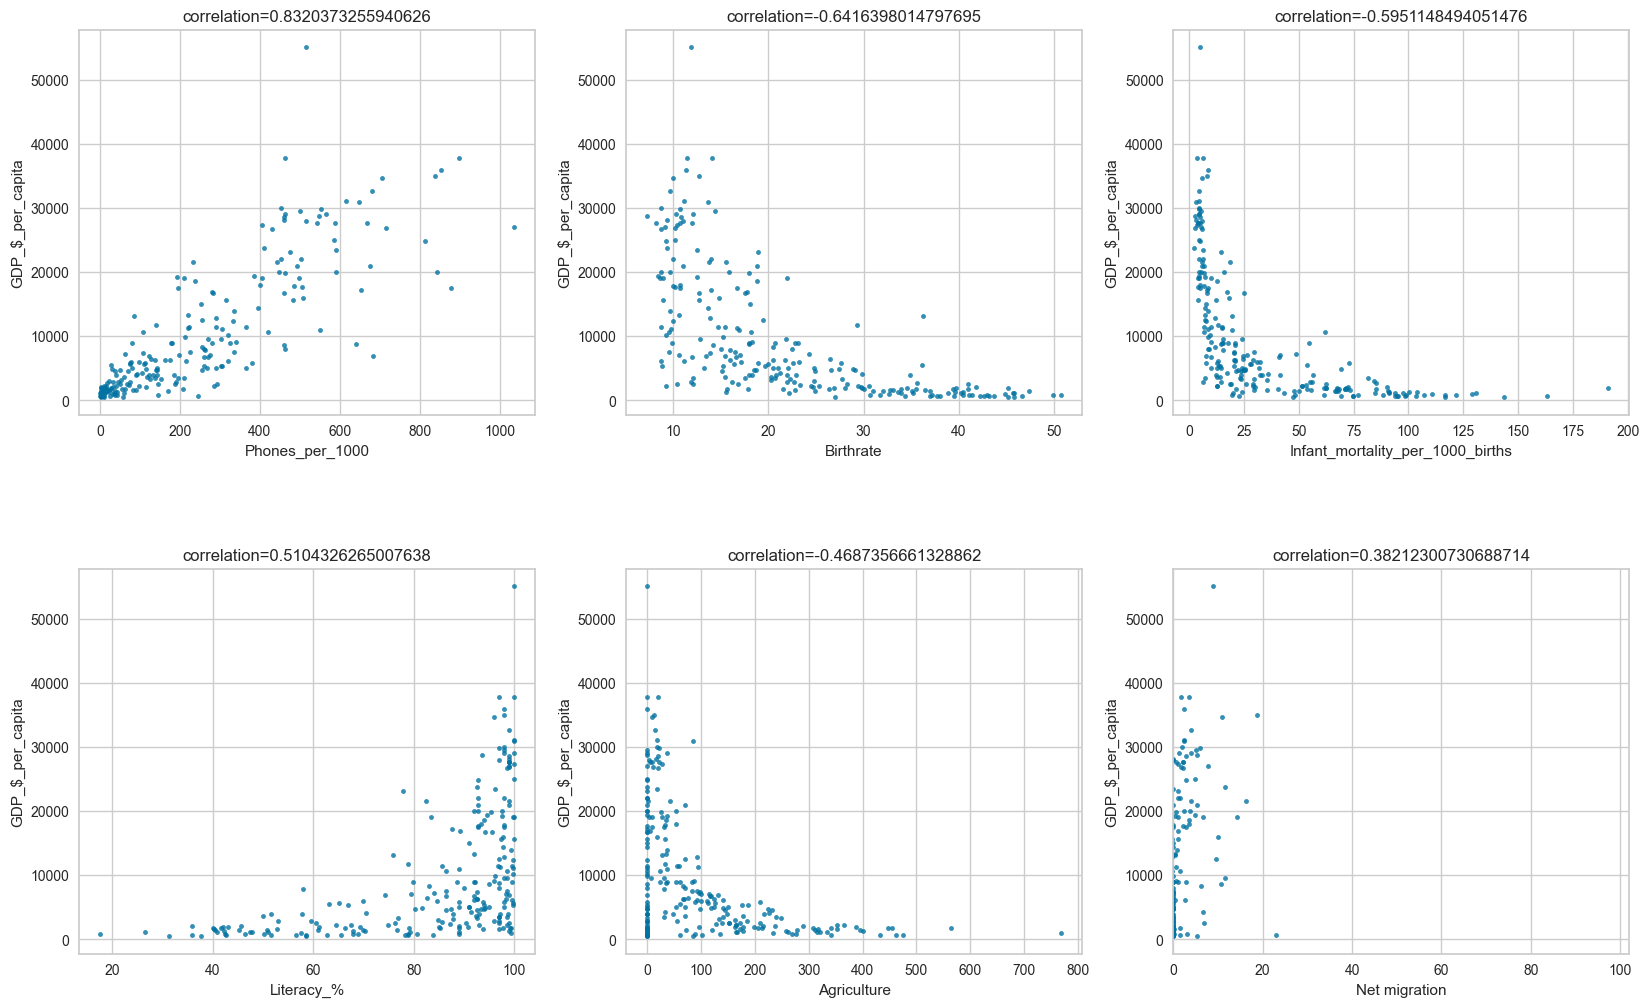

In [647]:
#top factors affecting GDP per capita
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df_2018.columns.values[2:]:
    if ((col!='GDP_$_per_capita')&(col!='Climate')):
        corr_to_gdp[col] = df_2018['GDP_$_per_capita'].corr(df_2018[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP_$_per_capita', data=df_2018,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

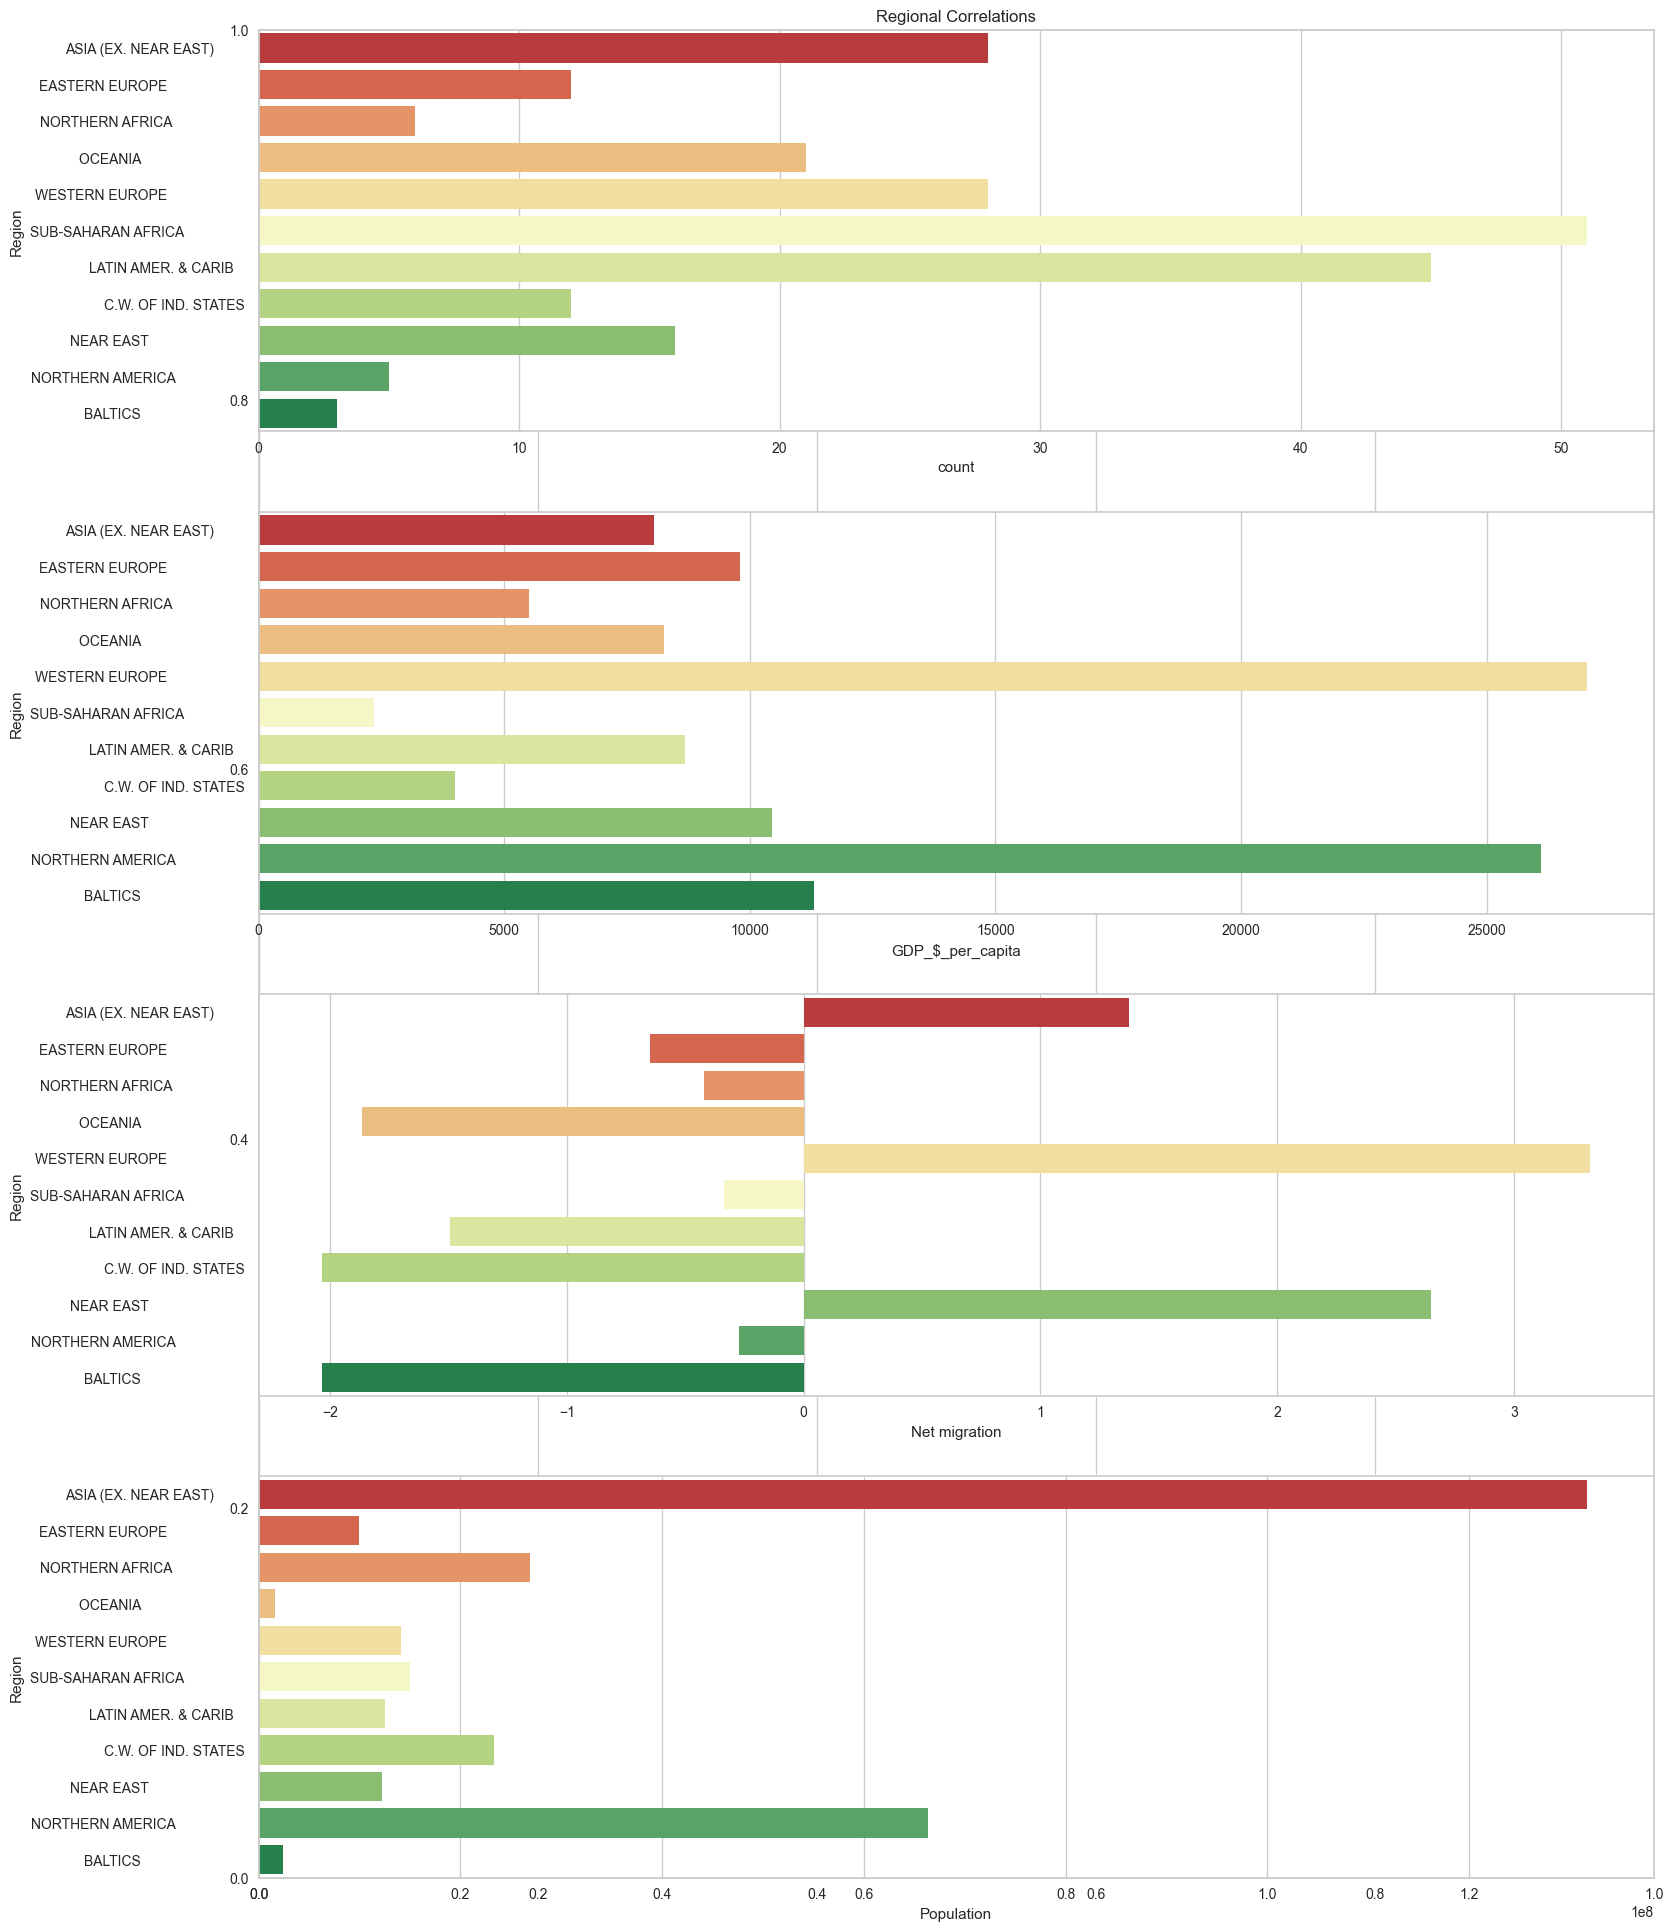

In [648]:
#checking the GDP, population and migration as per region
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Correlations')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= df_2018, y= 'Region', ax= ax1, palette='RdYlGn')
sns.barplot(data= df_2018, y= 'Region', x= 'GDP_$_per_capita', ax= ax2, palette='RdYlGn', ci= None)
sns.barplot(data= df_2018, y= 'Region', x= 'Net migration', ax= ax3, palette='RdYlGn', ci= None)
sns.barplot(data= df_2018, y= 'Region', x= 'Population', ax= ax4, palette='RdYlGn', ci= None)
plt.show()

#### **Section 3.2 observations summary:**

---


1. Based on the data, the six variables most strongly correlated with GDP per capita are phones, birthrate, infant mortality, literacy, agriculture, and net migration. This finding is consistent with existing research that highlights technology, literacy levels, and mortality rates as significant influencers of economic development.
2. The notable correlation between net migration and GDP per capita is understandable, as migrants often relocate to countries offering better opportunities and higher GDP per capita. As depicted in the analysis, regions with the highest migration rates include Western Europe, Asia, and the Near East.
3. It's noteworthy that Sub-Saharan Africa (SSA) and Latin America have the highest number of countries, while Asia boasts the largest population. However, Northern America and Western Europe lead in terms of GDP per capita, indicating variations in economic prosperity across regions.
4. The analysis reaffirms the tendency for African countries to exhibit lower GDP per capita compared to other regions worldwide. This observation underscores the economic challenges faced by many countries on the African continent.
















---



# **Section 4) Initial Modelling - Phase 1: Global**
**_NB. This initial modelling focuses on the objectives below at a surface level only, there is another section for more intense modelling based on observations here as will be explained_**

In this section, I initiate the modeling process based on the entire dataset by employing two distinct approaches to address the project objectives: a linear regression model and a random forest model. These models are selected based on their suitability for predicting GDP per Capita, the primary target variable. Linear regression will model relationships between variables, making it an ideal choice for this initial analysis. On the other hand the random forest model offers greater flexibility and can capture non-linear relationships and interactions among the features, potentially leading to more accurate predictions. By employing both linear regression and random forest models, I aim to asess performance in predicting GDP per Capita and determine which approach yields more favorable results. The models' performance will be evaluated using standard metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared, providing a comprehensive assessment of their predictive capabilities. 

**Focus Questions:**

3. **Can a machine learning algorithm be trained on the various factors and then accurately predict GDP per capita for any given country?**  

4. **Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa?**





###  **4.1) Preprocessing**

**Label Encoding**


The Region feature is a categorical features and hence I first convert it into machine readable form so that the model takes them it into consideration.

In [649]:
#label encoding the region column
LE = LabelEncoder()
df['Region_label'] = LE.fit_transform(df['Region'])
df.head()

,Country,Region,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Year,Region_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,2018,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00,2018,3
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,2018,6
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,70.65,132.05,537.20,2018,8
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,8.60,200.65,614.90,2018,10


### **4.2) Linear Regression Model**

In [650]:
#assigning the train and test samples of the data
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m',
       'Coastline_coast_area_ratio', 'Net migration',
       'Infant_mortality_per_1000_births', 'GDP_$_per_capita', 'Literacy_%',
       'Phones_per_1000', 'Arable_%', 'Crops_%', 'Other_%', ' Climate ',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'Year',
       'Region_label']
target = 'GDP_$_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [651]:
#applying the linear regression
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
mae_train = mean_absolute_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
mae_test = mean_absolute_error(test_pred_Y, test_Y)
r2_train = r2_score(train_Y, train_pred_Y)
r2_test = r2_score(test_Y, test_pred_Y)

print('rmse_train:',rmse_train,'mae_train:',mae_train,'R squared train:',r2_train)
print('rmse_test:',rmse_test,'mae_test:',mae_test,'R squared test:',r2_test)

rmse_train: 6.724930645674414e-11 mae_train: 2.7004723602258242e-11 R squared train: 1.0
rmse_test: 6.128216292845749e-11 mae_test: 2.4994485855810287e-11 R squared test: 1.0


 #### **Section 4.2 observations summary:**

---


*  The regression model assigns the GDP per capita as the dependent variable and all others as the independent variables.  

*  As shown above, the output of the Linear Regression model shows low metrics on both the training and testing datasets. Specifically, the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are orders of magnitude smaller than the target variable's scale, indicating minimal prediction errors. Additionally, the R-squared values of 1.0 for both the training and testing sets suggest that the model explains 100% of the variance in the target variable

* Despite the very good performance metrics, this indicates potential overfitting in the model because the model has learnt the training data too well, capturing noise that does not generalize to unseen data. In this case, the discrepancy between the training and testing metrics is negligible, suggesting that the model may be excessively complex and tailored to the training data, thereby failing to generalize well to new observations. Further regularization techniques are warranted to address overfitting and enhance the model's robustness.










---



###  **4.3) Random Forest Model**

In [652]:
#applying the random forest model
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
mae_train = mean_absolute_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
mae_test = mean_absolute_error(test_pred_Y, test_Y)
r2_train = r2_score(train_Y, train_pred_Y)
r2_test = r2_score(test_Y, test_pred_Y)

print('rmse_train:',rmse_train,'mae_train:',mae_train,'R squared train:',r2_train)
print('rmse_test:',rmse_test,'mae_test:',mae_test,'R squared test:',r2_test)


rmse_train: 1551.5377080027176 mae_train: 557.3898110732163 R squared train: 0.9736881391746298
rmse_test: 1868.0291079490692 mae_test: 631.7574143931739 R squared test: 0.9641607691468979


#### **Section 4.3 observations summary:**

---

  

*  The output of the Random Forest model shows that the RMSE and MAE for both the training and test sets are relatively high, indicating a considerable level of error in the predictions. The R-squared value for both the training set  and testset is 0.97 indicating that the model's performance decreases when applied to unseen data, further suggesting overfitting.

*  The high values of Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared for both the training and test sets suggest that the Random Forest model may also not be accurately capturing the patterns and relationships in the data. There is a significant level of error in the model's predictions and there is room for improvement in its performance. Given these observations, it's evident that a different approach may be necessary to improve the model's performance. In the second phase of modelling, I will focus on refining the modeling approach by targeting a specific region to potentially enhance predictive accuracy.


















---



###  **4.4) Visualizing the results**
To check a sample of the model outputs, I make a scatter plot of prediction against the actuals. As you can see the model gives a resonable prediction, as majority of the data points are gathering around the line y=x.

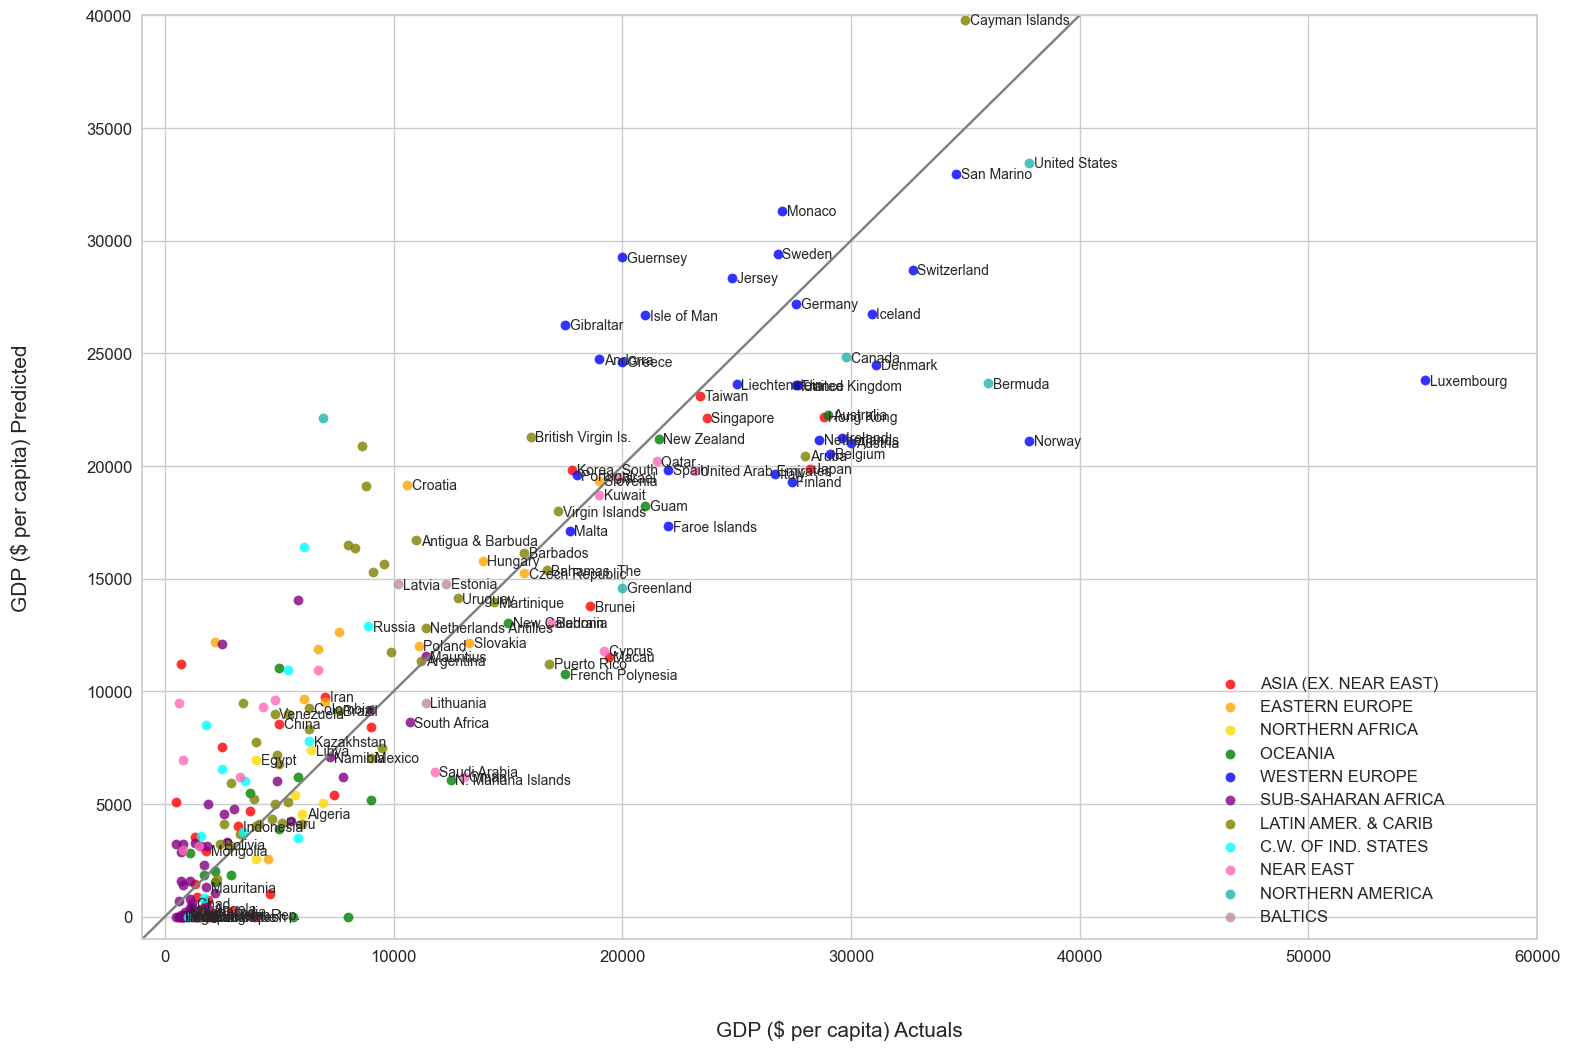

In [653]:
#assigning the train and test samples of the data
train, test = train_test_split(df_2018, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area_Sq_m',
       'Pop. Density_per_sq_m', 'Coastline_coast_area_ratio',
       'Net migration', 'Infant_mortality_per_1000_births',
       'Literacy_%', 'Phones_per_1000',
       'Arable_%', 'Crops_%', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service']
target = 'GDP_$_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

#applying the linear regression
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

#visualising the GDP per capita
plt.figure(figsize=(18,12))

train_test_Y = pd.concat([train_Y, test_Y])
train_test_pred_Y = pd.concat([train_pred_Y, test_pred_Y])

df_modelled = df_2018.loc[train_test_Y.index]
label = df_modelled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[df_modelled['Region']==region]
    Y = train_test_pred_Y.loc[df_modelled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region)
plt.legend(loc=4,prop={'size': 12})

ax.set_xlabel('GDP ($ per capita) Actuals',labelpad=40)
ax.set_ylabel('GDP ($ per capita) Predicted',labelpad=40)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100)
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((df_modelled['Area_Sq_m'].iloc[i]>8e5) |
       (df_modelled['Population'].iloc[i]>1e8) |
       (df_modelled['GDP_$_per_capita'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

#### **Section 4.4 observations summary:**


---


Questions Answered:

**-> Can a machine learning algorithm be trained on the various factors and then accurately predict GDP per capita for any given country?**

The line y=x represents perfect predictions, where the predicted values exactly match the actual values. My data points cluster around this line, indicating that the models are accurately capturing the relationship between the geo-economic factors which are the independent variables and the GDP per capita which is the dependent variable.

Therefore, the output proves that the model can indeed predict the GDP per capita for the countries. As shown in the scatter plot above, the predicted vs actuals of majority of the countries are aligned as they are converge along the line.

*  There is some room for improvement for the model and an option for evaluating more models but I focus on this in the next section where I narrow down to one specific region to understand the best parameters.


**-> Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa?**

* Yes, the predicted values seem more accurate for the bottom 5 regions in terms of GDP per Capita as compared to the regions with higher GDP per Capita. In their research paper "National Income and Its Distribution',Brueckner and Lederman (2015) affirm that inequality on GDP per capita in different countries is greatly influenced by income inequalities and the effect this has on aggregate output.

* Interestingly, countries in the lower GDP per Capita brackets often share similar socio-economic characteristics, presenting a more homogeneous economic landscape with fewer complexities. The above models, trained on data predominantly representing countries with lower economic development, seem to capture and generalize well to these common characteristics, thus yielding more accurate predictions.

* In contrast, nations with higher GDP per Capita like Luxembourg likely exhibit greater economic diversity, intricate interdependencies, and non-linear relationships among geo-economic factors. These complexities may be the ones presenting challenges for the models in capturing the nuanced relationships accurately, leading to comparatively less precise predictions for countries in the higher GDP per Capita brackets.





  















---



#   **Section 5) A Deep Dive into Sub Saharan Africa (SSA) Region**

From the visualization above, it is clear that the models performs better in predicting GDP for regions with lower GDP than for those with higher levels. This suggests that to make accurate predictions for Kenya, I need to refocus the analysis on Sub-Saharan Africa (SSA), where I delve deeper into the factors that drive economic dynamics in this region. In this section, I focus on SSA by creating a subset of the dataframe containing data exclusively from this region. I begin by inspecting this subset just like the global dataset. then re-evaluate the top factors influencing GDP to gain insights into this economic landscape. I then analyze the top 30 countries in SSA based on GDP, population, and literacy rates to identify any notable patterns or trends. Additionally, I explore the relationship between GDP and agriculture, given the significant role of agriculture in driving economic growth within the SSA region. 

The section answers the last question from my objectives:

**5. Can I use the model to build a GDP simulator for Kenya from the insights gained about the Sub-Saharan Africa region?**

###  **5.1) Exploring the SSA data**

In [654]:
#extracting SSA data
SSA_df=(df_2018[df_2018['Region'].str.contains("SUB-SAHARAN AFRICA")])
SSA_df.head()

,Country,Region,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Year
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,2.41,0.24,97.35,1.8,45.11,24.20,96.0,658.0,246.0,2018
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,...,18.08,2.40,79.52,2.0,38.85,12.22,316.0,138.0,546.0,2018
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,...,0.65,0.01,99.34,1.0,23.08,29.50,24.0,469.0,507.0,2018
31,Burkina Faso,SUB-SAHARAN AFRICA,13902972,274200,50.7,0.00,0.00,97.57,1100.0,26.6,...,14.43,0.19,85.38,2.0,45.62,15.60,322.0,196.0,482.0,2018
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,290.7,0.00,-0.06,69.29,600.0,51.6,...,35.05,14.02,50.93,2.0,42.22,13.46,463.0,203.0,334.0,2018


In [655]:
#describing the SSA data
SSA_df.describe()

,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,Phones_per_1000,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Year
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.00000,51.000000,51.0
mean,1.499377e+07,4.772825e+05,92.264706,5.106078,-0.335098,80.039216,2340.098039,62.472549,42.507843,11.695882,3.728039,84.377255,1.880392,36.043922,15.16000,186.732941,210.17902,323.436471,2018.0
std,2.345202e+07,5.801928e+05,129.364174,16.961832,2.347984,33.440061,2608.198706,19.242693,84.084812,12.177256,8.125678,16.146159,0.461311,9.221798,6.12156,173.702537,191.85170,244.585068,0.0
min,7.502000e+03,3.740000e+02,2.500000,0.000000,-12.070000,7.780000,500.000000,17.600000,0.200000,0.040000,0.000000,40.810000,1.000000,12.130000,5.49000,0.030000,0.04000,0.210000,2018.0
25%,1.540931e+06,2.794050e+04,17.350000,0.000000,-0.140000,62.105000,800.000000,46.950000,4.000000,3.585000,0.135000,80.015000,1.800000,33.335000,10.47000,24.500000,27.28500,0.610000,2018.0
50%,8.090068e+06,2.458570e+05,39.600000,0.130000,0.000000,76.830000,1400.000000,62.700000,9.700000,7.200000,0.700000,89.820000,2.000000,37.980000,14.86000,163.000000,196.00000,382.000000,2018.0
75%,1.562184e+07,7.771020e+05,101.050000,0.765000,0.000000,96.445000,2150.000000,79.550000,26.800000,13.250000,2.580000,95.585000,2.000000,41.990000,19.08500,313.500000,278.50000,526.500000,2018.0
max,1.318597e+08,2.505810e+06,608.300000,107.910000,6.780000,191.190000,11400.000000,97.000000,380.900000,49.260000,48.960000,99.960000,3.000000,50.730000,29.74000,769.000000,906.00000,684.000000,2018.0


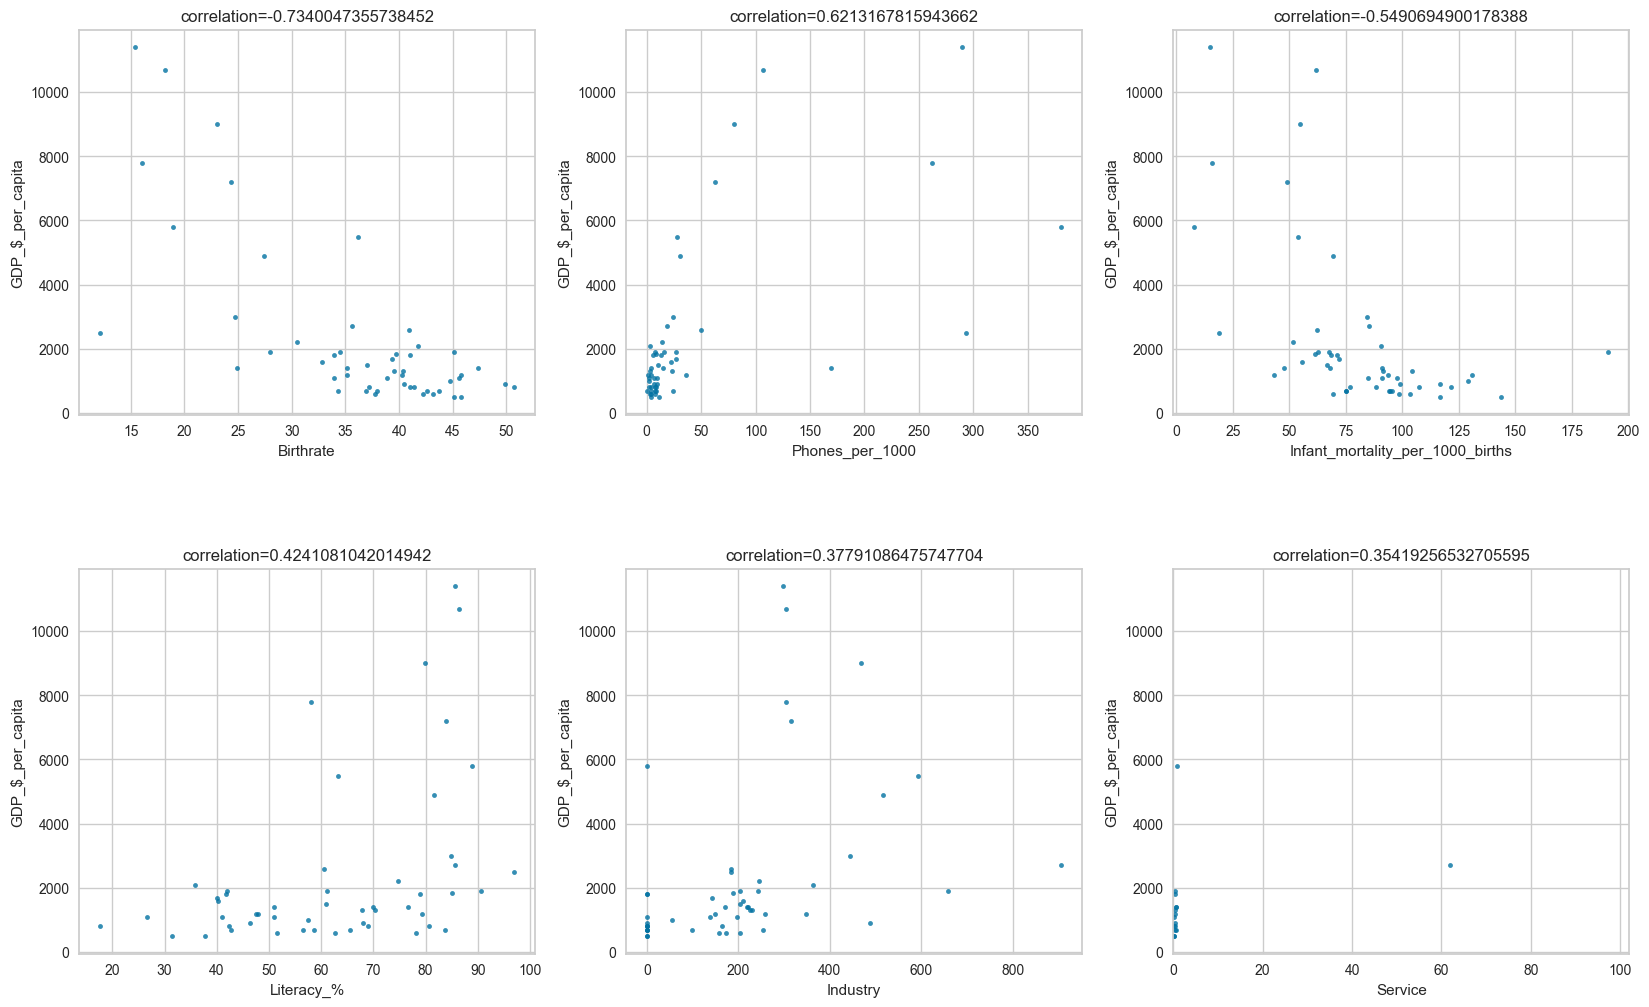

In [656]:
#top factors affecting GDP per capita in SSA
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in SSA_df.columns.values[2:]:
    if ((col!='GDP_$_per_capita')&(col!='Climate')):
        corr_to_gdp[col] = SSA_df['GDP_$_per_capita'].corr(SSA_df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP_$_per_capita', data=SSA_df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

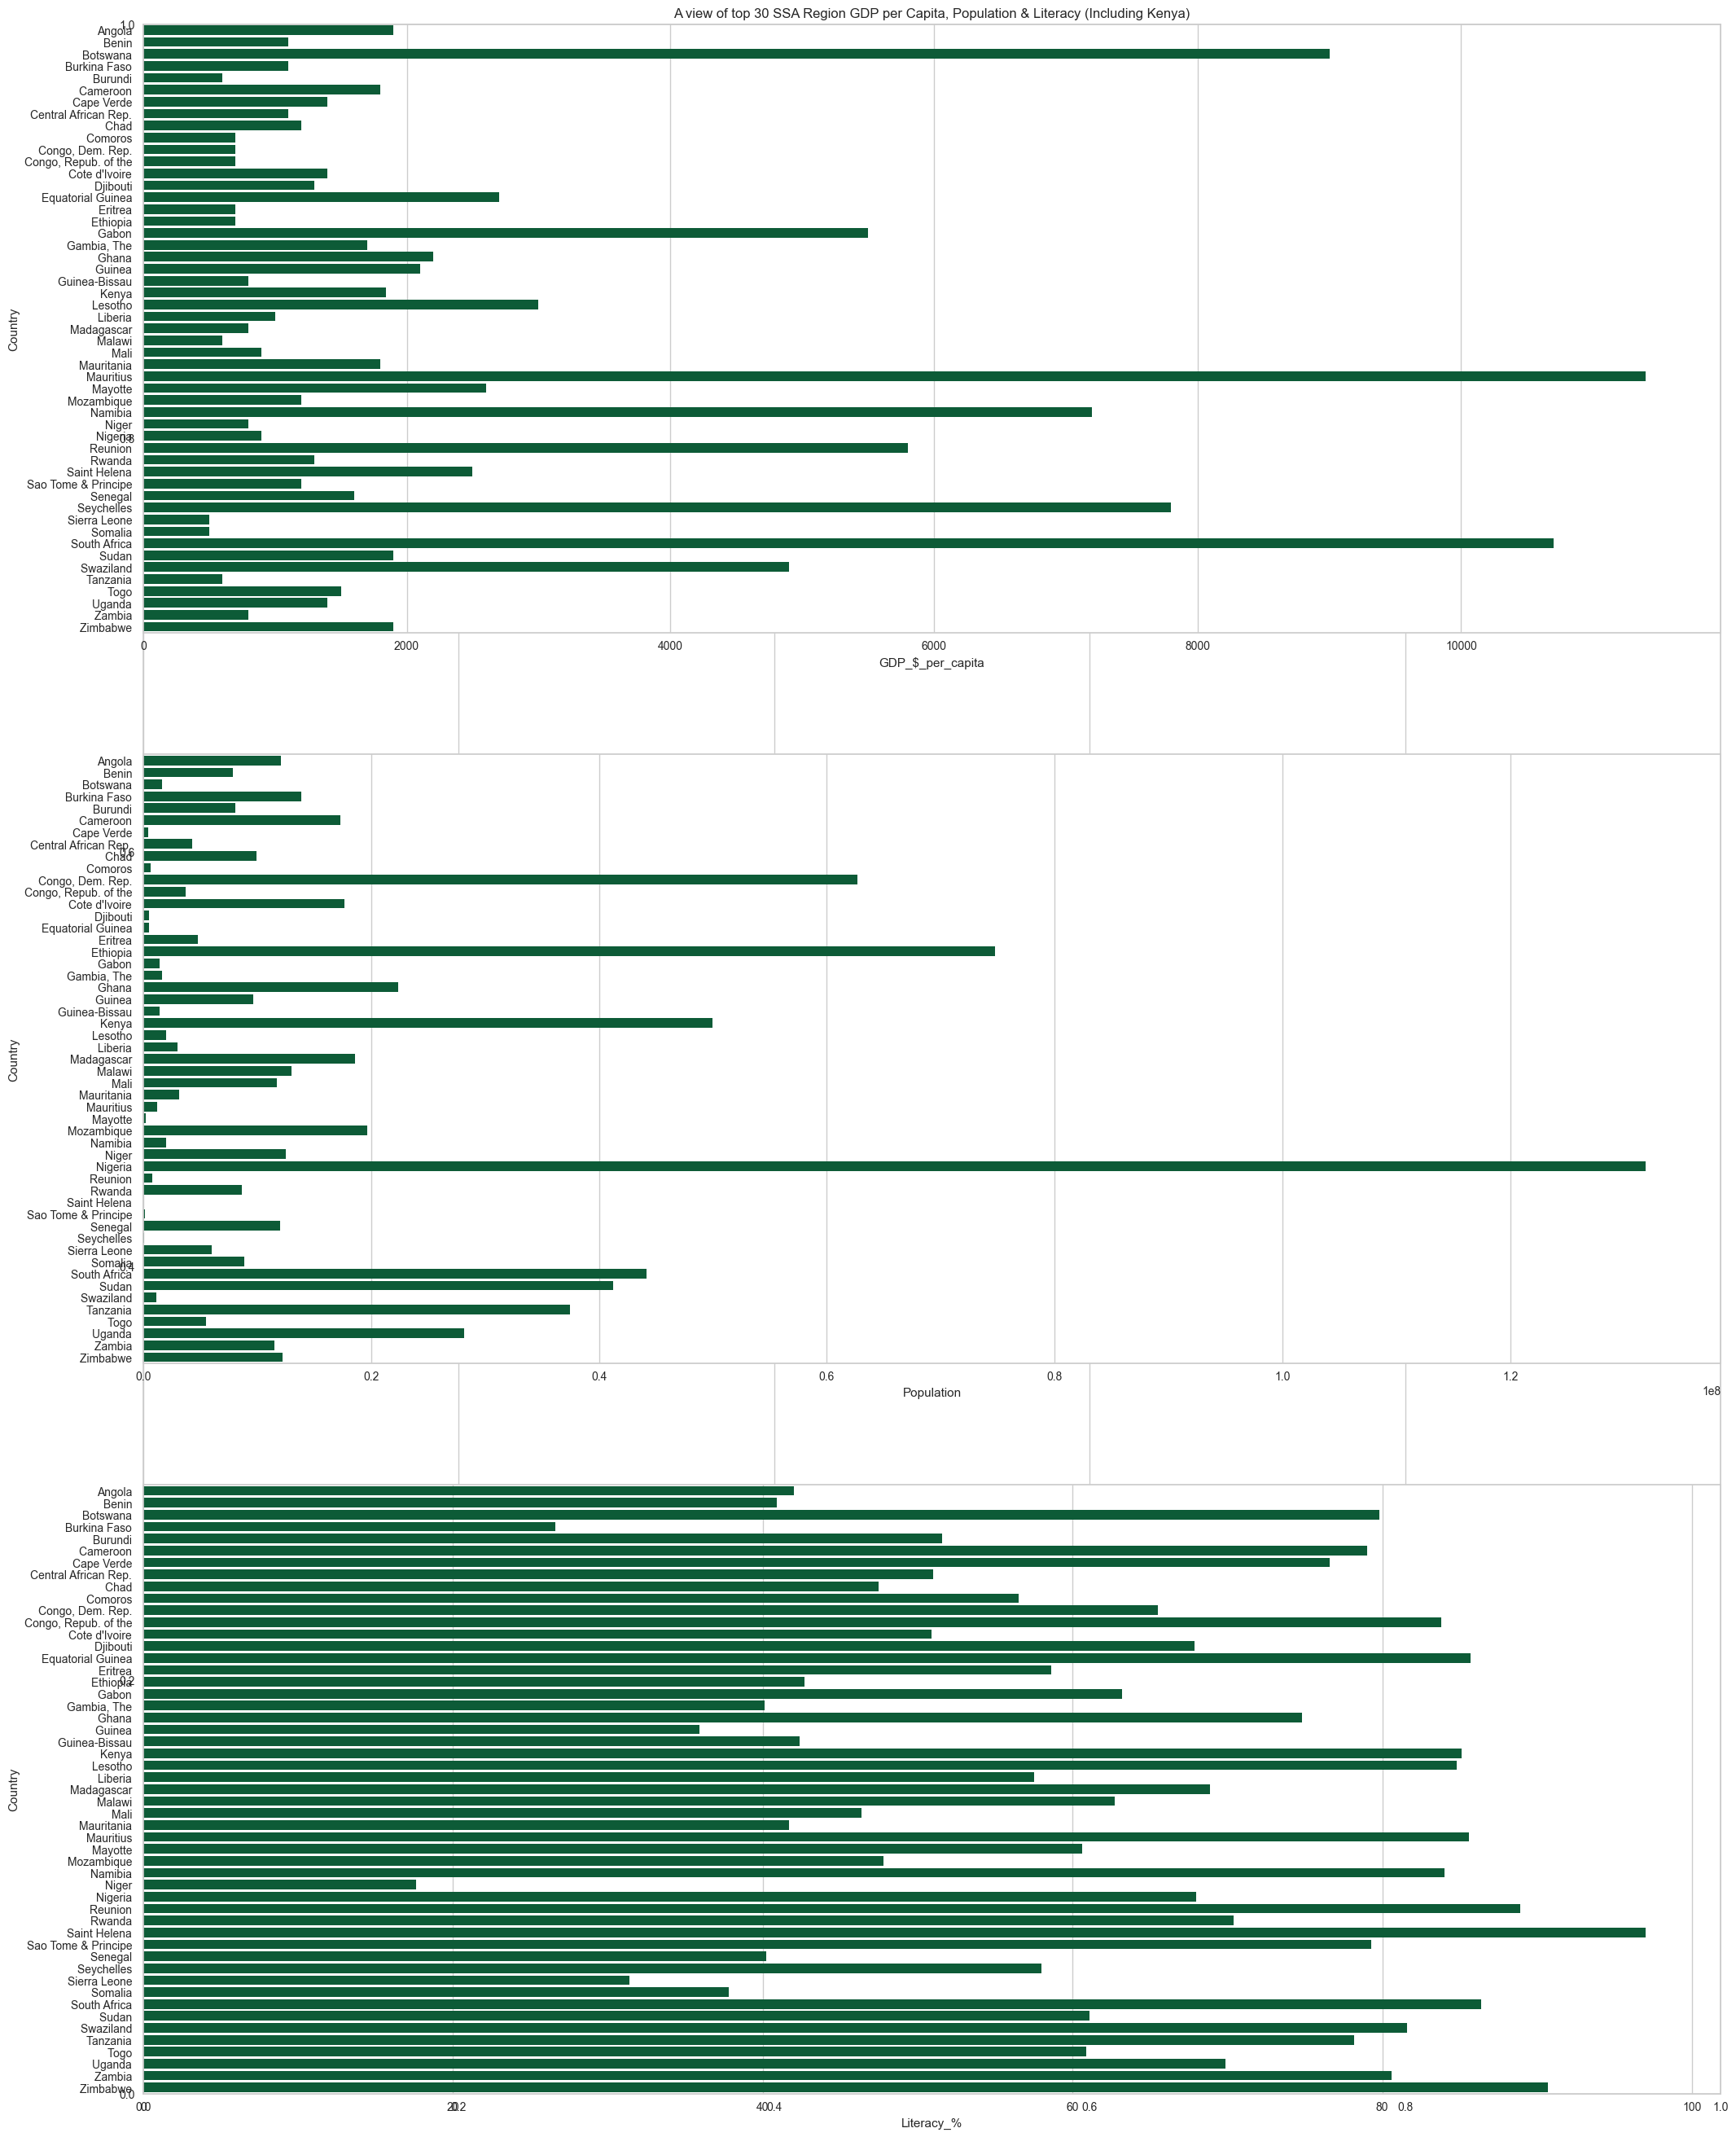

In [657]:
#investigating the GDP, population and literacy in the SSA region
fig = plt.figure(figsize=(25, 33))
plt.title('A view of top 30 SSA Region GDP per Capita, Population & Literacy (Including Kenya)')
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

sns.barplot(data= SSA_df, y= 'Country', x= 'GDP_$_per_capita', ax= ax1, color='#006838', ci= None)
sns.barplot(data= SSA_df, y= 'Country', x= 'Population', ax= ax2, color='#006838', ci= None)
sns.barplot(data= SSA_df, y= 'Country', x= 'Literacy_%', ax= ax3, color='#006838', ci= None)
plt.show()

<Figure size 2000x2000 with 0 Axes>

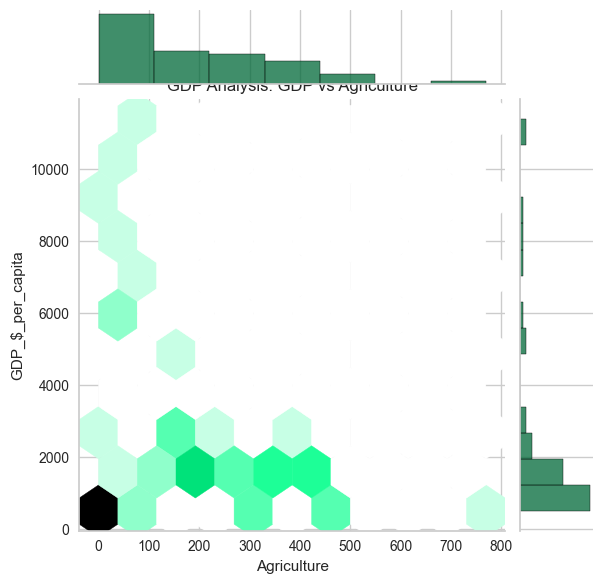

In [658]:
#a closer look at GDP vs Agriculture
fig = plt.figure(figsize=(20, 20))
sns.jointplot(data= SSA_df, x= 'Agriculture', y= 'GDP_$_per_capita', kind= 'hex',color='#006838')
plt.title('GDP Analysis: GDP vs Agriculture')
plt.show()

#### **Section 5.1 observations summary:**

---

  

*  In SSA the top countries in terms of GDP per Capita are South Africa, Mauritius, Namibia, Seychelles and Botswana and Gabon. A deeper literature review of what makes these countries lead amongst their peers confirms that in Africa the heavily agriculture, mineral and tourism based economies do better.  Eg. the economy of Gabon is also heavily dependent on its oil reserves and revenue from oil production accounts for about 43% of the country’s GDP and 81% of its exports. Botswana is boosted by its abundant natural resources such as gemstones and precious metals and South Africa benefits greatly from the production of electricity as it has a nuclear power plant(Mappr, 2023).

*   Kenya is among the contries with the highest population, with Nigeria, Ethiopia and Congo leading as at the time of this dataset. Rapid population growth that does not grow at par with other economoc and infrastructural development tends to result in declines in GDP due to increased per capita food consumption, poorer land quality and overally high dependency ratios. This explains the disparity in population vs the GDP per capita in the dataset.

*   From the dataset the literacy levels are mostly uniform in SSA with Kenya also among the countries with the highest literacy levels. 

* On the other hand, I was surprised by the relationship between GDP and Agriculture as shown by the hex above. It shows that countries with higher value addition from agriculture do not necessarily translate to higher GDP values. This proves that it cannot stand as a strong factor economically by itself especially in countries with high population. GDP per capita needs vibrancy, investment and growth in multiple economic industries and activities to boost the overall GDP.



















---



#   **Section 6) Detailed Modelling - Phase 2: SSA Region**

##  **6.1) Pre-processing the SSA data**

In this section I start by preprocessing the SSA data in preparation for modelling. This involves further normalizing the data using MinMaxScaler, a technique that scales the features to a specified range between 0 and 1. Normalizing the data ensures that all features contribute equally to the modeling process, regardless of their original scale. This prevents features with larger magnitudes from dominating the model's learning process and ensures that the model can effectively capture patterns and relationships in the data without bias. 

In [659]:
#normalising the data in preparation for modelling
SSA_df = (df[df['Region'].str.contains("SUB-SAHARAN AFRICA")])
SSA_df_normalised = SSA_df.copy()
cols = ['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m',
       'Coastline_coast_area_ratio', 'Net migration',
       'Infant_mortality_per_1000_births', 'GDP_$_per_capita', 'Literacy_%',
       'Phones_per_1000', 'Arable_%', 'Crops_%', 'Other_%', ' Climate ',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service',]
SSA_df_normalised[cols] = minmax_scale(SSA_df_normalised[cols])
SSA_df_normalised = SSA_df_normalised.drop(columns=['Country', 'Region','Region_label'])
SSA_df_normalised.head()


,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,Phones_per_1000,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Year
5,0.091926,0.475349,0.011944,0.001154,0.640432,0.948074,0.134249,0.308756,0.019206,0.047162,0.004736,0.923133,0.434783,0.813742,0.736090,0.118592,0.692923,0.342626,2018
21,0.059586,0.042831,0.106396,0.000976,0.640432,0.402671,0.065579,0.296083,0.024008,0.353816,0.047356,0.662079,0.521739,0.667446,0.285714,0.390364,0.145324,0.760803,2018
26,0.012389,0.228850,0.000943,0.000000,0.640432,0.246430,0.743691,0.744240,0.202932,0.012720,0.000197,0.952269,0.086957,0.298902,0.935338,0.029648,0.493892,0.706440,2018
31,0.105395,0.104455,0.076379,0.000000,0.640432,0.467232,0.065579,0.131336,0.017185,0.282387,0.003749,0.747877,0.521739,0.825660,0.412782,0.397776,0.206403,0.671592,2018
33,0.061309,0.010494,0.453560,0.000000,0.637346,0.321983,0.022661,0.419355,0.008087,0.685910,0.276638,0.243485,0.521739,0.746202,0.332331,0.571958,0.213774,0.465291,2018


##  **6.2) Feature Importance Assessments**

In this section, I aim to identify the most significant features for predicting GDP to improve the performance of the model compared to the global modeling approach. To achieve this, I use the following techniques to inspect important features from various algorithms. Based on their outputs, the most important features are the ones that will be fed into the models in this section:

**1. Principal Component Analysis(PCA)**: PCA reduces the dimensionality of the dataset while preserving the most important information. It identifies linear combinations of features that explain the maximum variance in the data.

**2. Backward Elimination**: This method  selects a P-value level of 0.05, fits the model with all features, identifies features with the highest P-value, removes the feature with highest P-value, fits the model again and repeats the Backward Elimination until all features with p-value higher the significance level are removed.

**3. Forward Elimination**: Similar to backward elimination, forward elimination starts with an empty set of features and iteratively adds the most significant feature until no further improvement is observed.

**4. XGBoost Feature Importance**: XGBoost is a tree-based ensemble learning algorithm that provides a built-in feature importance score. It evaluates the contribution of each feature to the model's performance based on how frequently it is used to split the data in the trees.

**5. Random Forest Feature Importance**: Similar to XGBoost, random forest also provides a feature importance score based on how much each feature decreases impurity across all trees in the forest.

_**Complementing the Algorithms**_

**6. Industry Knowldege**: It is crucial to complement the algorithmic findings with economic industry knowledge regarding the factors that economists consider essential for GDP performance. This step ensures a holistic understanding of the predictors identified by the algorithms and allows for validation and refinement based on established economic principles based on a desktop research. I incorporate industry knowledge to provide context to the data-driven insights to tie it to real-world dynamics.

####  **6.2.1) Principal Component Analysis(PCA)**

In [660]:
#Dropping the Year column as it is not ideal for the PCA
SSA_df_normalised1 = SSA_df_normalised.drop(columns=['Year'])
#dropping the Year column as it is not ideal for the PCA
SSA_df_normalised1 = SSA_df_normalised.drop(columns=['Year'])
pca = PCA(n_components=10)
PC = pca.fit_transform(SSA_df_normalised1)
pca_SSA = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10'])

pca_SSA.head(6)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.669190,-0.290937,-0.135120,0.395055,-0.071003,-0.219940,-0.056545,0.396715,0.125461,-0.024843
1,0.036379,0.140433,-0.400682,-0.134220,0.098082,-0.064835,-0.206893,-0.011246,0.045642,-0.025139
2,0.173458,-0.970795,-0.028563,0.370011,-0.260849,-0.174077,0.029927,-0.081259,-0.158167,-0.042445
3,-0.213345,0.111534,-0.405762,-0.083117,0.069817,-0.152428,-0.297037,0.078185,0.046689,-0.050195
4,0.256938,0.725288,-0.327317,0.122050,-0.108285,0.002633,-0.059214,0.015889,-0.043543,0.018579
5,0.005390,-0.032733,-0.219482,-0.091199,0.021249,0.325203,-0.014191,-0.228607,-0.095653,0.038748


Text(0.5, 0, 'Principal Components')

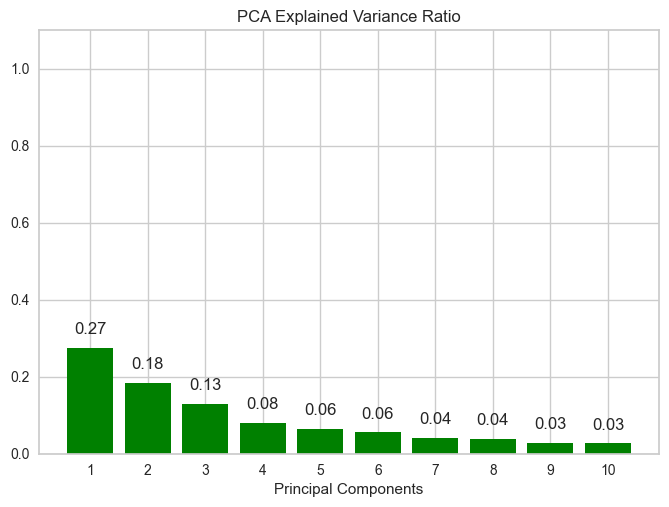

In [661]:
#visualising the PCA output
fig, ax = plt.subplots(nrows=1,
                       ncols=1)
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_,
    color= "green"
)

for x, y in zip(np.arange(len(df.columns)) + 1,
                pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('PCA Explained Variance Ratio')
ax.set_xlabel('Principal Components')

####  **6.2.2) Backward Elimination**

In [662]:
#dropping the GDP per capita column from the independent variables and assigning it as the target variables to apply backward elimination.
X1 = SSA_df_normalised.drop(columns=['GDP_$_per_capita'])
y1 = pd.DataFrame(SSA_df_normalised['GDP_$_per_capita'])

In [663]:
#Backward elimination code below iterates through the predictors until only the significant variables are chosen
warnings.simplefilter(action='ignore', category=FutureWarning)

cols = list(X1)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m', 'Net migration', 'Infant_mortality_per_1000_births', 'Literacy_%', 'Phones_per_1000', ' Climate ', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'Year']


####  **6.2.3) Forward Elimination**

In [664]:
# Forward elimination code below also iterates through the predictors until only the significant variables are chosen
cols = list(X1)
selected_features_FE = []

while len(cols) > 0:
    remaining_features = list(set(cols) - set(selected_features_FE))
    p_values = []

    for feature in remaining_features:
        X_1 = X1[selected_features_FE + [feature]]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y1, X_1).fit()
        p_values.append((feature, model.pvalues[feature]))

    # Selecting the feature with the lowest p-value
    best_feature, min_p_value = min(p_values, key=lambda x: x[1])
    if min_p_value < 0.05:
        selected_features_FE.append(best_feature)
    else:
        break

print("Selected features using Forward Elimination:")
print(selected_features_FE)

Selected features using Forward Elimination:
['Birthrate', ' Climate ', 'Industry', 'Pop. Density_per_sq_m', 'Deathrate', 'Phones_per_1000', 'Infant_mortality_per_1000_births', 'Area_Sq_m', 'Literacy_%', 'Service', 'Agriculture', 'Population', 'Net migration', 'Year']


####  **6.2.4) XGBoost Feature Importance**

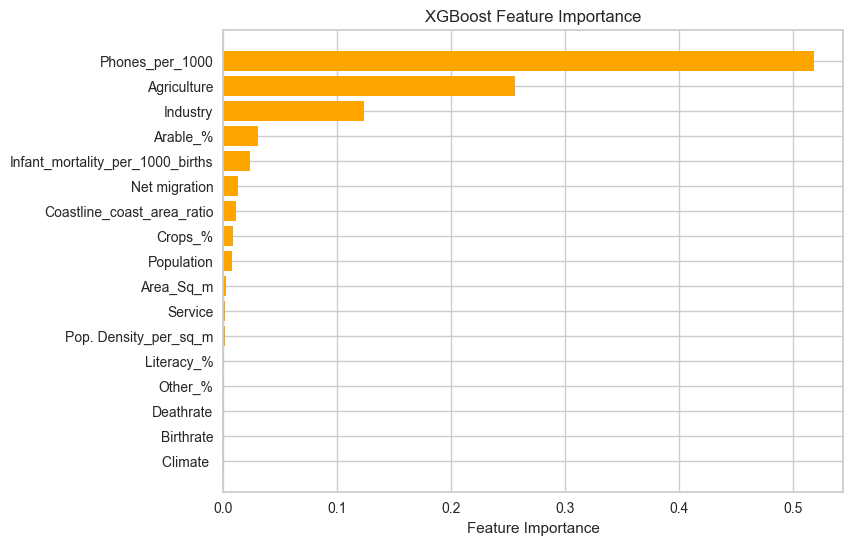

In [665]:

# Copy the normalized dataframe
features_df = SSA_df_normalised.copy()

# Initializing the XGB Regressor
xgb_reg = xgb.XGBRegressor()
X = features_df.drop(columns=['GDP_$_per_capita', 'Year'])
y = features_df['GDP_$_per_capita']
xgb_reg.fit(X, y)

# Getting feature importances
feature_importances = xgb_reg.feature_importances_
feature_names = X.columns

# Sorting feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_names = feature_names[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
plt.barh(range(len(sorted_importances)), sorted_importances, color='orange')
plt.yticks(range(len(sorted_importances)), sorted_names)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

####  **6.2.5) Random Forest Feature Importance**

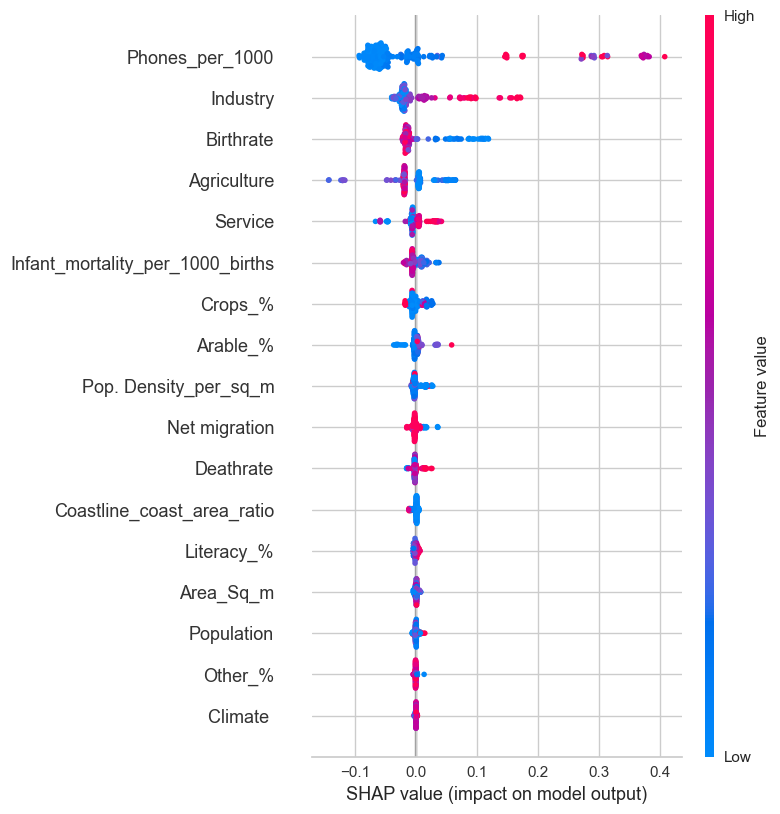

In [666]:
# Assessing using the Random Forest
X = features_df.drop(columns=['GDP_$_per_capita', 'Year'])
y = features_df['GDP_$_per_capita']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)  # Initialize Random Forest Regressor
model.fit(X_train, y_train)

# Initializing TreeExplainer
explainer = shap.TreeExplainer(model)

# Computing SHAP values
shap_values = explainer.shap_values(X_test)

# Visualizing
shap.summary_plot(shap_values, X_test)

#### **Section 6.2 observations summary:**


---



The above section was aimed at selecting the most important features after an analysis of the SSA data with the above feature importance checking means. The following are the observations.  

**1. PCA** - The observation from PCA showed the varying significance of different components in explaining the variance within the dataset. The PCA explained variance ratio reveals a gradual decline in the explained variance across ten principal components. The first principal component explains approximately 27% of the variance in the data, indicating that it captures a substantial portion of the variability. Subsequent principal components contribute decreasingly to the overall variance. This suggests that the first few principal components contain the most significant information about the dataset, while the later components capture less variability and may represent noise or less important features.

**2. Backward Elimination** - The top most significant features are: Population, Area_Sq_m, Pop. Density_per_sq_m, Net migration, Infant_mortality, Literacy, Phones/Technology, Climate, Birthrate, Deathrate, Agriculture, Industry, Service,Year

**3. Forward Elimination** - Birthrate, Climate, Industry, Pop. Density_per_sq_m, Deathrate, Phones/Technology, Infant_mortality, Area_Sq_m, Literacy, Service, Agriculture, Population, Net migration, Year

**4. XGBoost Feature Importance** - Phones_per_1000, Agriculture, Industry, Arable land, Infant_mortality, Net migration, Coastline area, Crops, Population,  Area_Sq_m, Service

**5. Random Forest Feature Importance** - Phones_per_1000, Industry, Birthrate, Agriculture, Service, Infant_mortality, Crops, Arable landand  Net Migratin 



The above top features were complemented with desktop research and consequently, the final 10 features that will be used for phase 2 modelling for th SSA region are

**Population, Pop. Density_per_sq_m, Infant_mortality_per_1000_births', Literacy_%, Phones_per_1000, Birthrate, Deathrate, Agriculture, Industry, Service,'DP_$_per_capita** . These are copiled into the final_df as shown below:



  















---



In [667]:
#The final dataset of the most optimal features that will be used in the next sections
feature_df=SSA_df.filter(['Population', 'Pop. Density_per_sq_m', 'Infant_mortality_per_1000_births', 'Literacy_%', 'Phones_per_1000', 'Birthrate','Deathrate','Agriculture', 'Industry', 'Service','GDP_$_per_capita'])
final_df=SSA_df_normalised.filter(['Population', 'Pop. Density_per_sq_m', 'Infant_mortality_per_1000_births', 'Literacy_%', 'Phones_per_1000', 'Birthrate','Deathrate','Agriculture', 'Industry', 'Service','GDP_$_per_capita'])
final_df.head()


,Population,Pop. Density_per_sq_m,Infant_mortality_per_1000_births,Literacy_%,Phones_per_1000,Birthrate,Deathrate,Agriculture,Industry,Service,GDP_$_per_capita
5,0.091926,0.011944,0.948074,0.308756,0.019206,0.813742,0.736090,0.118592,0.692923,0.342626,0.134249
21,0.059586,0.106396,0.402671,0.296083,0.024008,0.667446,0.285714,0.390364,0.145324,0.760803,0.065579
26,0.012389,0.000943,0.246430,0.744240,0.202932,0.298902,0.935338,0.029648,0.493892,0.706440,0.743691
31,0.105395,0.076379,0.467232,0.131336,0.017185,0.825660,0.412782,0.397776,0.206403,0.671592,0.065579
33,0.061309,0.453560,0.321983,0.419355,0.008087,0.746202,0.332331,0.571958,0.213774,0.465291,0.022661


##  **6.3) Modelling with the significant features**
In this section, I proceed to use 5 distinct models to analyze GDP per capita: Random Forest, Linear Regression, XGBoost, Support Vector Machine (SVM). These models offer diverse approaches to understanding and predicting economic indicators. Additionally, I explore the potential of Facebook Prophet specifically for analyzing GDP per capita in Kenya.

**Unlike the Global modelling done in section 4-Phase 1, this Phase 2-SSA section enhances the robustness of the output through several key steps. Following feature engineering as explained in the previous section, hyperparameter tuning is conducted using both Grid Search CV and Randomized CV, optimizing model parameters for better performance. Ensemble methods - Boosting and Bagging are employed to aggregate the predictions of multiple models, thereby reducing variance and improving accuracy. Additionally, K-Fold Cross Validation is utilized to assess the model's generalization ability. Finally, the performance of each model is evaluated using metrics such as RMSE, MAE, and R2 to ensure accurate predictions and validate the effectiveness of the chosen approaches. This ensures the final chosen predictive model will accurately capture the SSA data for better predictions of Kenya.**

GDP is assigned as the target variable then the dataset is split where 80% of the dataset will be used to train and 20% will be used to test.


In [668]:
# Assigning features and target variable
X = final_df.drop(columns=['GDP_$_per_capita'])
y = final_df['GDP_$_per_capita']

# Train-test split with a test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  **6.3.1) Optimised Random Forest Model**

* Random Forest was selected because it is robust to overfitting, it provided my feature importance rankings, and it can capture complex nonlinear relationships in the data, making it suitable for predicting GDP per capita which has these relationships.
* Hyperparameter tuning was done using Grid Search CV because to find the best combination of hyperparameters by exhaustively searching through a specified parameter grid. This was aimed at avoiding overfitting and ensureing that this model can now generalize well to unseen data.
* K-Fold Cross Validation was used for to assess the performance and generalization ability. By splitting the dataset into K equally sized folds, it trains the model K times on different train-test splits, allowing for a more reliable estimate of the model's performance compared to a single train-test split. This reduces the variance  and provides a more accurate estimation of the model's performance on unseen data.
* After hyperparameter tuning and selecting the best parameters using Grid Search CV, the Random Forest Regressor model was then trained on the training data using the optimal parameters.and evaluated using the RMSE, MAE, and R-squared scores 

In [669]:
#tuning the parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [6, 8],
    'min_weight_fraction_leaf': [0.01, 0.05],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_X, train_Y)
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'max_depth': 8, 'min_weight_fraction_leaf': 0.05, 'n_estimators': 50}


In [670]:
# Initializing K-Fold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=8, min_weight_fraction_leaf=0.01, random_state=42)

# Lists to store evaluation metrics for each fold
rmse_train_scores = []
mae_train_scores = []
rmse_test_scores = []
mae_test_scores = []
r2_train_scores = []
r2_test_scores = []

# Performing K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    train_X, test_X = X.iloc[train_index], X.iloc[test_index]
    train_Y, test_Y = y.iloc[train_index], y.iloc[test_index]
    
    # Fitting the model  and predicting
    rf_model.fit(train_X, train_Y)
    train_pred_Y = rf_model.predict(train_X)
    test_pred_Y = rf_model.predict(test_X)
    
    # Evaluation
    rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
    mae_train = mean_absolute_error(train_pred_Y, train_Y)
    rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
    mae_test = mean_absolute_error(test_pred_Y, test_Y)
    r2_train = r2_score(train_Y, train_pred_Y)
    r2_test = r2_score(test_Y, test_pred_Y)
    rmse_train_scores.append(rmse_train)
    mae_train_scores.append(mae_train)
    rmse_test_scores.append(rmse_test)
    mae_test_scores.append(mae_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

# Calculating average evaluation metrics across all folds
avg_rmse_train = np.mean(rmse_train_scores)
avg_mae_train = np.mean(mae_train_scores)
avg_rmse_test = np.mean(rmse_test_scores)
avg_mae_test = np.mean(mae_test_scores)
avg_r2_train = np.mean(r2_train_scores)
avg_r2_test = np.mean(r2_test_scores)

# The average evaluation metrics
print('Average RMSE Train:', avg_rmse_train, 'Average MAE Train:', avg_mae_train, 'Average R-squared Train:', avg_r2_train)
print('Average RMSE Test:', avg_rmse_test, 'Average MAE Test:', avg_mae_test, 'Average R-squared Test:', avg_r2_test)

Average RMSE Train: 0.017319599621013454 Average MAE Train: 0.011493428396870148 Average R-squared Train: 0.993474862763153
Average RMSE Test: 0.02259240441281467 Average MAE Test: 0.014705242375220987 Average R-squared Test: 0.9888461643339383


#### **Section 6.3.1 Random Forest Results Summary:**

---

  

As compared to the random forest modelling I had applied to all countries in the dataset before, the output of the Random Forest model applied to the Sub Saharan Africa region is quite impressive showing a relatively small difference between the predicted and actual values. The average RMSE and MAE for the training set are 0.0172 and 0.0114, respectively, suggesting that the model's predictions closely align with the actual values in the training data. Additionally, the R-squared value of 0.9935 indicates that the model explains approximately 99.35% of the variance in the training data, indicating a high level of predictive accuracy. Similarly, for the testing set, the average RMSE and MAE are 0.0227 and 0.0147, respectively, indicating minimal deviation between predicted and actual values. The R-squared value of 0.9887 for the testing set further confirms the model's strong predictive performance on unseen data. Overall, these results suggest that the Random Forest model effectively captures the underlying patterns in the data and generalizes well to new observations.
















---



### **6.3.2) Linear Regression Model**

* The Linear Regression Model was also chosen due to its simplicity and interpretability, providing a baseline for understanding the relationship between the independent variables and the target variable.
* K-Fold Cross Validation was used to assess the model's performance using 5 splits to divide the dataset into training and testing subsets multiple times, allowing each data point to be used for both training and validation. 
* The linear regression model was then trained and evaluated iteratively using the RMSE, MAE, and R-squared to assess the model's predictive accuracy and goodness of fit.



In [671]:
# Initializing K-Fold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing Linear Regression model
linear_model = LinearRegression()

# Lists to store evaluation metrics for each fold
rmse_train_scores = []
mae_train_scores = []
rmse_test_scores = []
mae_test_scores = []
r2_train_scores = []
r2_test_scores = []

# Performing K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    train_X, test_X = X.iloc[train_index], X.iloc[test_index]
    train_Y, test_Y = y.iloc[train_index], y.iloc[test_index]
    
    # Fitting the model and predicting
    linear_model.fit(train_X, train_Y)
    train_pred_Y = linear_model.predict(train_X)
    test_pred_Y = linear_model.predict(test_X)
    
    # Calculating evaluation metrics for train and test sets
    rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
    mae_train = mean_absolute_error(train_pred_Y, train_Y)
    rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
    mae_test = mean_absolute_error(test_pred_Y, test_Y)
    r2_train = r2_score(train_Y, train_pred_Y)
    r2_test = r2_score(test_Y, test_pred_Y)
    rmse_train_scores.append(rmse_train)
    mae_train_scores.append(mae_train)
    rmse_test_scores.append(rmse_test)
    mae_test_scores.append(mae_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

# Calculate average evaluation metrics across all folds
avg_rmse_train = np.mean(rmse_train_scores)
avg_mae_train = np.mean(mae_train_scores)
avg_rmse_test = np.mean(rmse_test_scores)
avg_mae_test = np.mean(mae_test_scores)
avg_r2_train = np.mean(r2_train_scores)
avg_r2_test = np.mean(r2_test_scores)

# The average evaluation metrics
print('Average RMSE Train:', avg_rmse_train, 'Average MAE Train:', avg_mae_train, 'Average R-squared Train:', avg_r2_train)
print('Average RMSE Test:', avg_rmse_test, 'Average MAE Test:', avg_mae_test, 'Average R-squared Test:', avg_r2_test)

Average RMSE Train: 0.11132329528602466 Average MAE Train: 0.08349551265958302 Average R-squared Train: 0.7304657926361413
Average RMSE Test: 0.11255173700259109 Average MAE Test: 0.08437714129907474 Average R-squared Test: 0.7233078585106423


#### **Section 6.3.2 Linear Regression Results Summary:**

---
Compared to the Random Forest model, the Linear Regression model exhibits higher error metrics across both training and testing sets. The average RMSE and MAE for the training data are 0.1113 and 0.0835, respectively, indicating a larger deviation between predicted and actual values compared to the Random Forest model. Similarly, the R-squared value of 0.7305 suggests that the Linear Regression model explains approximately 73.05% of the variance in the training data, which is lower than that of the Random Forest model. For the testing data, the average RMSE and MAE are 0.1126 and 0.0844, respectively, indicating a similar level of error as seen in the training data. The R-squared value of 0.7233 for the testing set also reflects a lower explanatory power compared to the Random Forest model. Overall, these results suggest that the Linear Regression model may not capture the underlying patterns in the data as effectively as the Random Forest model.

---

### **6.3.3) Optimised XGBoost Model**


* The XGBoost Model was chosen for its powerful gradient boosting algorithm, which excels in handling complex datasets and capturing non-linear relationships between features and the target variable. Its ability to minimize loss functions effectively makes it suitable for regression tasks like predicting GDP per capita.
* Hyperparameter Tuning: Grid Search CV was utilized to search through a predefined parameter grid and find the optimal combination of hyperparameters for the XGBoost model. This process systematically evaluated different parameter configurations using cross-validation to identify the set that yields the best performance based on the negative mean squared error.
* Bagging: XGBoost inherently utilizes bagging by randomly sampling both the data instances and features for each tree in the ensemble, thereby enhancing the model's generalization ability.
* K-Fold Cross Validation:was employed to ensure the model can generalize to unseen data. 
* The XGBoost model was then trained and evaluated for each fold, tusing the RMSE, MAE, and R-squared and the average observed. 

In [672]:
# Defining the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [6, 8],
    'learning_rate': [0.1, 0.01],
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_X, train_Y)
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [673]:
# Checking un-normalised to view gdp predictions later
X1 = feature_df.drop(columns=['GDP_$_per_capita'])
y1 = feature_df['GDP_$_per_capita']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Defining the best parameters obtained from GridSearchCV
best_params = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.1
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Xgb_model = XGBRegressor(**best_params, random_state=42)

# Performing K-Fold Cross Validation
for train_index, test_index in kf.split(X1):
    train_X1, test_X1 = X1.iloc[train_index], X1.iloc[test_index]
    train_Y1, test_Y1 = y1.iloc[train_index], y1.iloc[test_index]
    
    # Fitting the model to the training data
    Xgb_model.fit(train_X1, train_Y1)
    
    # Make predictions 
    train_pred_Y1 = Xgb_model.predict(train_X1)
    test_pred_Y1 = Xgb_model.predict(test_X1)
    

In [674]:
# Defining the best parameters obtained from GridSearchCV
best_params = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.1
}

# Initializing K-Fold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing XGBRegressor model 
xgb_model = XGBRegressor(**best_params, random_state=42)

# Lists to store evaluation metrics for each fold
rmse_train_scores = []
mae_train_scores = []
rmse_test_scores = []
mae_test_scores = []
r2_train_scores = []
r2_test_scores = []

# Performing K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    train_X, test_X = X.iloc[train_index], X.iloc[test_index]
    train_Y, test_Y = y.iloc[train_index], y.iloc[test_index]
    
    # Fitting the model to the training data
    xgb_model.fit(train_X, train_Y)
    
    # Make predictions 
    train_pred_Y = xgb_model.predict(train_X)
    test_pred_Y = xgb_model.predict(test_X)
     
    # Calculating evaluation metrics 
    rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
    mae_train = mean_absolute_error(train_pred_Y, train_Y)
    rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
    mae_test = mean_absolute_error(test_pred_Y, test_Y)
    r2_train = r2_score(train_Y, train_pred_Y)
    r2_test = r2_score(test_Y, test_pred_Y)
    
    # Appending evaluation metrics to the respective lists
    rmse_train_scores.append(rmse_train)
    mae_train_scores.append(mae_train)
    rmse_test_scores.append(rmse_test)
    mae_test_scores.append(mae_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

# Calculating average evaluation metrics across all folds
avg_rmse_train = np.mean(rmse_train_scores)
avg_mae_train = np.mean(mae_train_scores)
avg_rmse_test = np.mean(rmse_test_scores)
avg_mae_test = np.mean(mae_test_scores)
avg_r2_train = np.mean(r2_train_scores)
avg_r2_test = np.mean(r2_test_scores)

# The average evaluation metrics
print('Average RMSE Train:', avg_rmse_train, 'Average MAE Train:', avg_mae_train, 'Average R-squared Train:', avg_r2_train)
print('Average RMSE Test:', avg_rmse_test, 'Average MAE Test:', avg_mae_test, 'Average R-squared Test:', avg_r2_test)

Average RMSE Train: 0.0036527250706433604 Average MAE Train: 0.002794366449334909 Average R-squared Train: 0.9997097129731607
Average RMSE Test: 0.021596460571881727 Average MAE Test: 0.012205687221380776 Average R-squared Test: 0.9895530348193198


#### **Section 6.3.3 XGBoost Results Summary:**

---
Compared to the previous two models, the XGBoost model demonstrates superior performance in terms of error metrics across both training and testing sets. For the training data, the XGBoost model exhibits an average RMSE of 0.0036 and a MAE of 0.02, indicating minimal deviation between predicted and actual values. Additionally, the R-squared value of 0.99 suggests that the model explains approximately 99% of the variance in the training data, surpassing the performance of the Random Forest model. In the testing data, the XGBoost model maintains a low average RMSE of 0.02 and MAE of 0.01, indicating consistent performance. The R-squared value of 0.9887 for the testing set further reinforces the model's ability to explain the variance in the data. Overall, these results indicate that the XGBoost model outperforms the Random Forest model and Linear Regression model, demonstrating superior predictive accuracy and explanatory power..

---

### **6.3.4) Support Vector Machine (SVM)**

* SVM was chosen for its effectiveness in handling both linear and non-linear relationships between features and the target variable. SVM is particularly useful for regression tasks like predicting GDP per capita due to its ability to capture complex decision boundaries and handle high-dimensional data.
* Hyperparameter Tuning: Random Search CV was used to explore a wide range of hyperparameter combinations and identify the optimal settings for the SVM model. This approach randomly samples from predefined distributions, making it yield good results.
* Stacking: Stacking Regressor was utilized to combine predictions from multiple base estimators, including Linear Regression, Random Forest, and XGBoost, with SVM as the final estimator. Stacking helped to leverage the strengths of different algorithms and improve overall predictive performance by blending their individual predictions. In this case, SVM serves as the final estimator, incorporating the collective knowledge from the base estimators to enhance the model's predictive accuracy.
* K-Fold Cross Validation was applied to evaluate the performance of the SVM model and ensure its generalization to unseen data just like the other models.
* The SVM model, along with the Stacking Regressor, was trained and evaluated using the RMSE, MAE, and R-squared. 

In [675]:
# Defining the SVM model
svm_model = SVR()

# Defining the parameter grid for SVM
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Performing RandomizedSearchCV for hyperparameter tuning 
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid, n_iter=10, 
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params_svm = random_search.best_params_

# Initializing the SVM model 
svm_model_best = SVR(**best_params_svm)

# Defining the base estimators for stacking
base_estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Initializing the StackingRegressor with SVM as the final estimator
stacked_model = StackingRegressor(estimators=base_estimators, final_estimator=svm_model_best)

# Training the stacked model
stacked_model.fit(X_train, y_train)

# Making predictions 
train_pred_Y = stacked_model.predict(X_train)
test_pred_Y = stacked_model.predict(X_test)

# Calculating the evaluation metrics 
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
mae_train = mean_absolute_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
mae_test = mean_absolute_error(test_pred_Y, y_test)
r2_train = r2_score(y_train, train_pred_Y)
r2_test = r2_score(y_test, test_pred_Y)

# The evaluation metrics
print('RMSE Train:', rmse_train, 'MAE Train:', mae_train, 'R-squared Train:', r2_train)
print('RMSE Test:', rmse_test, 'MAE Test:', mae_test, 'R-squared Test:', r2_test)

RMSE Train: 0.043840389098643455 MAE Train: 0.03821718855825903 R-squared Train: 0.9587404531674963
RMSE Test: 0.04953871869387699 MAE Test: 0.0449733248136076 R-squared Test: 0.9435905336671756


#### **Section 6.3.4 SVM Results Summary:**

---
The SVM model exhibits slightly higher errors compared to the XGBoost model, indicating slightly lower predictive accuracy. In the training set, the SVM model shows an average RMSE of 0.0438 and a MAE of 0.0382, with an R-squared value of 0.9587. While these metrics suggest a good fit to the training data, they are slightly higher than those of the XGBoost model, indicating a slightly lower level of accuracy in capturing the variance. Similarly, in the testing set, the SVM model demonstrates an RMSE of 0.0495, MAE of 0.0450, and an R-squared value of 0.9436, implying a slightly lower predictive performance compared to XGBoost. Overall, while the SVM model performs reasonably well, the XGBoost model appears to offer better predictive accuracy and explanatory power.

---

##  **6.4) Investigating the potential of Facebook Prophet**


In this section, I explore the use of the Facebook Prophet model to forecast the GDP per capita for Kenya. I slice the dataset to isolate data pertaining only to Kenya and align the Year and GDP to comply with Prophet's requirements. Subsequently, the model is trained on this data and used to make future predictions for the next 10 years. Finally, the forecasted values are visualized using a plot to illustrate the projected trend of GDP per capita for Kenya


02:44:18 - cmdstanpy - INFO - Chain [1] start processing


02:44:18 - cmdstanpy - INFO - Chain [1] done processing


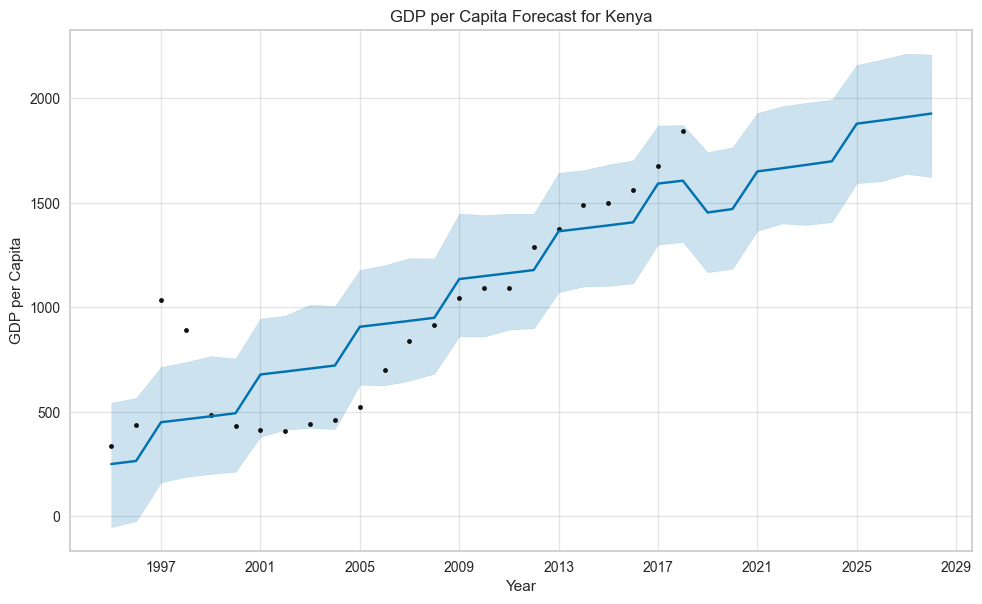

In [676]:
# Slicing the DataFrame to select data only for Kenya
kenya_df = SSA_df[SSA_df['Country'] == 'Kenya ']

# Convert Year to 'ds'
kenya_df['ds'] = pd.to_datetime(kenya_df['Year'], format='%Y')

# Renaming GDP to 'y'
kenya_df = kenya_df.rename(columns={'GDP_$_per_capita': 'y'})
kenya_df = kenya_df[['ds', 'y']]
kenya_df = kenya_df.reset_index(drop=True)

# Initializing Prophet model
model = Prophet()
model.fit(kenya_df)

# Make future predictions 
future = model.make_future_dataframe(periods=10, freq='Y')

# Forecasting and visualising
forecast = model.predict(future)
fig = model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Forecast for Kenya')
plt.show()

In [677]:
# Evaluation of the facebook prophet
actual = kenya_df[:-10]['y']

# Trimming the forecast to match the length of the actual data
forecast_trimmed = forecast.iloc[:len(actual)]
predicted = forecast_trimmed['yhat']

# evaluation metrics
rmse = mean_squared_error(actual, predicted, squared=False)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

RMSE: 519.6339670514135
MAE: 354.930167210373
R-squared: -0.7978473214434687


#### **Section 6.4.1 Facebook Prophet Summary:**

---
The results from the Facebook Prophet model yield disappointing outcomes, with an RMSE of 519.63 and an MAE of 354.93. Moreover, the negative R-squared value of -0.7978 indicates that the model performs worse than simply using the mean value for predictions, suggesting that it fails to capture any meaningful relationship between the input features and the target variable. These metrics collectively show the model's inability to provide accurate forecasts using this dataset, rendering it unsuitable for predicting GDP per capita. The reason for the poor performance is:

* Insufficient data - There is limited amount of the historical data available and the dataset does not contain enough data points to accurately capture the underlying patterns using this approach.

* Complexity of relationship - In this instance, the model may not have been able to effectively capture the complex relationships and dynamics influencing Kenya's GDP per capita.

**Given the poor performance of the Facebook Prophet model in this scenario, it is not recommended for GDP forecasting unless supplemented with a more extensive and granular dataset containing a richer set of economic indicators. Additionally, quarterly or more frequent GDP data might provide better inputs for forecasting models, allowing for more accurate predictions of future trends.**

---

##  **6.5) The Best Model**

Overall, the much thorough approach undertaken in modeling Sub-Saharan Africa's GDP per capita, involving feature engineering, hyperparameter tuning, ensemble methods for mitigating overfitting, and K-fold cross-validation, markedly improved performance compared to the initial global dataset modeling. XGBoost emerged as the most effective model, exhibiting superior predictive capabilities over the others with the lowest RMSE and MAE and a R2 of 98% as shown in the table below. Given all the measures that have been applied to avert overfitting and generalisation, this model is deemed the best for the GDP simulator. Furthermore, this analysis showed the unsuitability of the Facebook Prophet model for such data, as its performance was very poor. 

In [678]:
# Shwing the output of all the models together
data = {
    'Model': ['Random Forest', 'Linear Regression', 'SVM', 'Facebook Prophet', 'XGBoost'],
    'RMSE': [0.0225, 0.1125, 0.0495, 519.63, 0.0215],  
    'MAE': [0.0147, 0.0843, 0.0449, 354.93, 0.0122],      
    'R2': [0.98, 0.68, 0.72, -0.79, 0.98]    
}

# Creating a DataFrame
evaluation_df = pd.DataFrame(data)
evaluation_df.set_index('Model', inplace=True)
table = tabulate(evaluation_df, headers='keys', tablefmt='fancy_grid')
print(table)


╒═══════════════════╤══════════╤══════════╤═══════╕
│ Model             │     RMSE │      MAE │    R2 │
╞═══════════════════╪══════════╪══════════╪═══════╡
│ Random Forest     │   0.0225 │   0.0147 │  0.98 │
├───────────────────┼──────────┼──────────┼───────┤
│ Linear Regression │   0.1125 │   0.0843 │  0.68 │
├───────────────────┼──────────┼──────────┼───────┤
│ SVM               │   0.0495 │   0.0449 │  0.72 │
├───────────────────┼──────────┼──────────┼───────┤
│ Facebook Prophet  │ 519.63   │ 354.93   │ -0.79 │
├───────────────────┼──────────┼──────────┼───────┤
│ XGBoost           │   0.0215 │   0.0122 │  0.98 │
╘═══════════════════╧══════════╧══════════╧═══════╛


#### **The Best Model, XGBoost is then exported using pickle for buliding the GDP silulator using Streamlit**

In [679]:
# Model Export for use in main.py
with open('Xgb_model.pkl', 'wb') as f:
    pickle.dump(Xgb_model, f)


# **PROJECT CONCLUSION**


---




The project has confirmed that machine learning can be used to investigate the patterns in the factors that affect GDP per capita for different countries and to develop a model that can predict the GDP when the most critical of these these factors are used as inputs. All the objective questions have been answered and explained in the respective sections observation summary notes. The project denotes the importance of diving deeper into the GDP specificities for countries per region for better model outcomes instead of analysing GDP globally. The model can aid in scenario planning, risk assessment, and providing a directional understanding of potential economic trajectories. It offers valuable guidance for long-term planning and strategy formulation for various sectors.

**1.   What factors are most strongly correlated with the GDP per capita of a country?**
   * For All countries, I found that Phones/Technology, Birthrate, Infant mortality, Literacy levels, Agriculture's value addition to GDP and Net Migration were most influential.  
   * For SSA, I observed that the  Phones/Technology, Birthrate, Infant mortality, Literacy levels and the contribution of Industry and Service secrors were found most influential.

**2.   Which countries have the highest and lowest GDP per capita and are the same factors influential in both groups?**
  * In the leading Western Europe region,  Luxembourg, Norway and the United States are the countries with the highest GDP per capita.
  * In SSA the top countries in terms of GDP per Capita are South Africa, Mauritius, Namibia, Seychelles and Botswana and Gabon

**3. Can a machine learning algorithm be trained on the various factors and then accurately predict GDP per capita for any given country?**
 * Yes, it has been confirmed that ML models can understand this data and predict. XGBoost performs best.

**4. Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa?**
 * Definitely - Once I focused on SSA and made the models robust, there was better performance.
 
**5. Can I use the model to build a GDP simulator for Kenya from the insights gained about the Sub-Saharan Africa region?**
 * Yes, the XGBoost model was used to build the Webapp and GDP Simulator accesible on Streamlit







---
 **-> Benefits**


*   In Kenya, economic development often tends to be politicised and this project allows for the use of data to contribute to these discussion and to shed light on the major geo-economic factors that need our attention, analysis and further investment in order to also be among the top in Africa. This project enhances understanding of the factors influencing GDP per capita, particularly in Sub-Saharan Africa, through comprehensive data analysis and modeling techniques.
* The project creates a useful tool where users can input various values to assess their impact and ifluence on the GDP. This can be useful for planning as well as overall simulation and understanding of geo-economic factors. 
* The project and POA unit overall increased my predictive modelling understanding, taught me how to deploy a model and how to build a treamlit website. 


---




----------------------------------------**Thank you for insights shared in the POA Unit**-----------------------------------------------------------------













